<a href="https://colab.research.google.com/github/ashtan2019/Week6/blob/master/week6_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train = x_train/120.5-1

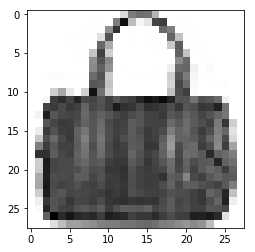

In [7]:
plt.imshow(x_train[4000], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [18]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 1024)             

In [19]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.602867, acc.: 62.50%] [G loss: 0.944065]


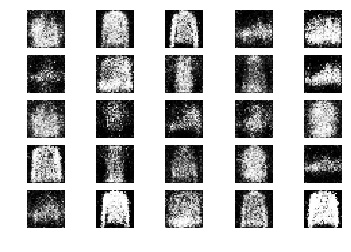

1 [D loss: 0.681070, acc.: 56.25%] [G loss: 0.950259]
2 [D loss: 0.590269, acc.: 70.31%] [G loss: 0.964672]
3 [D loss: 0.568957, acc.: 75.00%] [G loss: 0.882139]
4 [D loss: 0.576274, acc.: 68.75%] [G loss: 1.022321]
5 [D loss: 0.621078, acc.: 62.50%] [G loss: 0.988308]
6 [D loss: 0.596247, acc.: 73.44%] [G loss: 1.070029]
7 [D loss: 0.695657, acc.: 57.81%] [G loss: 1.048938]
8 [D loss: 0.632539, acc.: 56.25%] [G loss: 0.882391]
9 [D loss: 0.496213, acc.: 84.38%] [G loss: 0.900594]
10 [D loss: 0.600939, acc.: 65.62%] [G loss: 0.946363]
11 [D loss: 0.525230, acc.: 75.00%] [G loss: 0.865962]
12 [D loss: 0.616873, acc.: 59.38%] [G loss: 0.818976]
13 [D loss: 0.562272, acc.: 73.44%] [G loss: 0.941249]
14 [D loss: 0.520630, acc.: 73.44%] [G loss: 1.011220]
15 [D loss: 0.527725, acc.: 73.44%] [G loss: 1.050667]
16 [D loss: 0.608229, acc.: 64.06%] [G loss: 1.080509]
17 [D loss: 0.579337, acc.: 67.19%] [G loss: 1.126596]
18 [D loss: 0.660282, acc.: 57.81%] [G loss: 1.037416]
19 [D loss: 0.57532

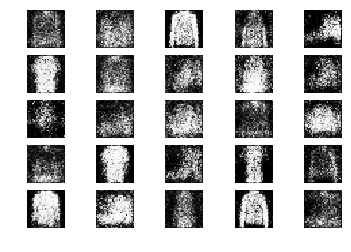

51 [D loss: 0.591503, acc.: 71.88%] [G loss: 0.976699]
52 [D loss: 0.655188, acc.: 62.50%] [G loss: 0.835276]
53 [D loss: 0.631954, acc.: 59.38%] [G loss: 0.969440]
54 [D loss: 0.628370, acc.: 60.94%] [G loss: 1.006194]
55 [D loss: 0.614179, acc.: 65.62%] [G loss: 0.903270]
56 [D loss: 0.587688, acc.: 67.19%] [G loss: 0.913736]
57 [D loss: 0.604357, acc.: 62.50%] [G loss: 0.959710]
58 [D loss: 0.543676, acc.: 67.19%] [G loss: 0.980201]
59 [D loss: 0.569601, acc.: 67.19%] [G loss: 0.953759]
60 [D loss: 0.554556, acc.: 71.88%] [G loss: 0.981174]
61 [D loss: 0.610619, acc.: 62.50%] [G loss: 0.916640]
62 [D loss: 0.595556, acc.: 73.44%] [G loss: 0.925256]
63 [D loss: 0.580808, acc.: 68.75%] [G loss: 0.872525]
64 [D loss: 0.663294, acc.: 59.38%] [G loss: 0.901828]
65 [D loss: 0.565458, acc.: 65.62%] [G loss: 0.975212]
66 [D loss: 0.599515, acc.: 70.31%] [G loss: 0.938623]
67 [D loss: 0.577776, acc.: 67.19%] [G loss: 1.061381]
68 [D loss: 0.662552, acc.: 59.38%] [G loss: 0.974485]
69 [D loss

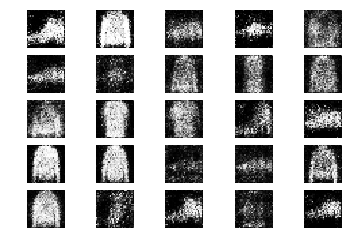

101 [D loss: 0.576004, acc.: 75.00%] [G loss: 0.912178]
102 [D loss: 0.532522, acc.: 76.56%] [G loss: 0.932913]
103 [D loss: 0.617842, acc.: 67.19%] [G loss: 0.982217]
104 [D loss: 0.603933, acc.: 68.75%] [G loss: 1.008882]
105 [D loss: 0.682365, acc.: 59.38%] [G loss: 0.999405]
106 [D loss: 0.617172, acc.: 68.75%] [G loss: 0.946131]
107 [D loss: 0.621359, acc.: 67.19%] [G loss: 0.928454]
108 [D loss: 0.562745, acc.: 68.75%] [G loss: 0.974400]
109 [D loss: 0.619602, acc.: 68.75%] [G loss: 0.915823]
110 [D loss: 0.555223, acc.: 73.44%] [G loss: 0.906543]
111 [D loss: 0.568489, acc.: 75.00%] [G loss: 0.954642]
112 [D loss: 0.639704, acc.: 60.94%] [G loss: 0.860135]
113 [D loss: 0.624897, acc.: 60.94%] [G loss: 0.935438]
114 [D loss: 0.678511, acc.: 50.00%] [G loss: 0.999706]
115 [D loss: 0.569128, acc.: 70.31%] [G loss: 0.967866]
116 [D loss: 0.606932, acc.: 65.62%] [G loss: 0.902360]
117 [D loss: 0.619552, acc.: 67.19%] [G loss: 0.891226]
118 [D loss: 0.595898, acc.: 70.31%] [G loss: 0.

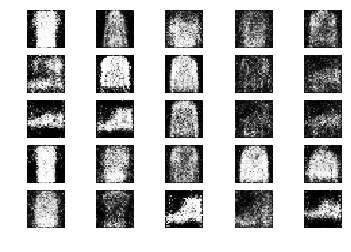

151 [D loss: 0.576270, acc.: 65.62%] [G loss: 1.006228]
152 [D loss: 0.509936, acc.: 76.56%] [G loss: 1.035881]
153 [D loss: 0.643255, acc.: 62.50%] [G loss: 1.016249]
154 [D loss: 0.621702, acc.: 64.06%] [G loss: 1.030795]
155 [D loss: 0.663950, acc.: 62.50%] [G loss: 0.962791]
156 [D loss: 0.686724, acc.: 51.56%] [G loss: 0.897981]
157 [D loss: 0.533106, acc.: 78.12%] [G loss: 0.903910]
158 [D loss: 0.619906, acc.: 64.06%] [G loss: 0.937712]
159 [D loss: 0.588168, acc.: 73.44%] [G loss: 0.903318]
160 [D loss: 0.582176, acc.: 68.75%] [G loss: 0.852964]
161 [D loss: 0.558049, acc.: 67.19%] [G loss: 1.049855]
162 [D loss: 0.617053, acc.: 62.50%] [G loss: 0.994810]
163 [D loss: 0.638878, acc.: 67.19%] [G loss: 0.907429]
164 [D loss: 0.620310, acc.: 67.19%] [G loss: 0.919434]
165 [D loss: 0.667129, acc.: 53.12%] [G loss: 0.938404]
166 [D loss: 0.551629, acc.: 67.19%] [G loss: 0.966085]
167 [D loss: 0.632374, acc.: 64.06%] [G loss: 0.927340]
168 [D loss: 0.609914, acc.: 65.62%] [G loss: 0.

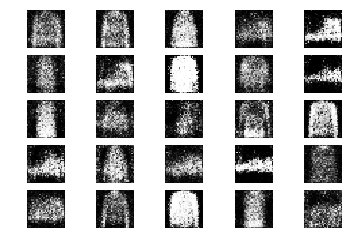

201 [D loss: 0.629721, acc.: 60.94%] [G loss: 0.903490]
202 [D loss: 0.625046, acc.: 62.50%] [G loss: 0.916036]
203 [D loss: 0.628496, acc.: 64.06%] [G loss: 0.953354]
204 [D loss: 0.622308, acc.: 65.62%] [G loss: 0.915368]
205 [D loss: 0.596552, acc.: 71.88%] [G loss: 0.904813]
206 [D loss: 0.626282, acc.: 62.50%] [G loss: 0.927292]
207 [D loss: 0.593100, acc.: 70.31%] [G loss: 0.936397]
208 [D loss: 0.660429, acc.: 59.38%] [G loss: 0.887575]
209 [D loss: 0.634543, acc.: 59.38%] [G loss: 0.935185]
210 [D loss: 0.634881, acc.: 67.19%] [G loss: 0.937351]
211 [D loss: 0.596890, acc.: 62.50%] [G loss: 1.011631]
212 [D loss: 0.616031, acc.: 71.88%] [G loss: 0.933921]
213 [D loss: 0.603970, acc.: 59.38%] [G loss: 0.938420]
214 [D loss: 0.575079, acc.: 73.44%] [G loss: 1.014297]
215 [D loss: 0.636858, acc.: 60.94%] [G loss: 0.891025]
216 [D loss: 0.598141, acc.: 67.19%] [G loss: 0.936256]
217 [D loss: 0.584537, acc.: 64.06%] [G loss: 1.052848]
218 [D loss: 0.631715, acc.: 57.81%] [G loss: 0.

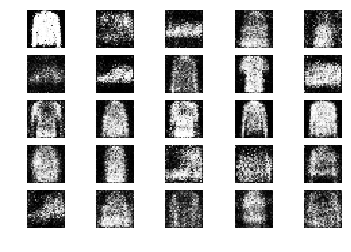

251 [D loss: 0.621102, acc.: 67.19%] [G loss: 1.006751]
252 [D loss: 0.555168, acc.: 73.44%] [G loss: 0.924340]
253 [D loss: 0.643764, acc.: 65.62%] [G loss: 0.932290]
254 [D loss: 0.565750, acc.: 73.44%] [G loss: 0.881229]
255 [D loss: 0.561004, acc.: 68.75%] [G loss: 0.879969]
256 [D loss: 0.579945, acc.: 68.75%] [G loss: 0.913878]
257 [D loss: 0.580348, acc.: 70.31%] [G loss: 0.903871]
258 [D loss: 0.556946, acc.: 79.69%] [G loss: 0.999809]
259 [D loss: 0.647144, acc.: 67.19%] [G loss: 0.908530]
260 [D loss: 0.565383, acc.: 70.31%] [G loss: 1.051926]
261 [D loss: 0.598224, acc.: 65.62%] [G loss: 0.912621]
262 [D loss: 0.632503, acc.: 59.38%] [G loss: 1.001133]
263 [D loss: 0.583725, acc.: 68.75%] [G loss: 0.915368]
264 [D loss: 0.623617, acc.: 64.06%] [G loss: 0.978751]
265 [D loss: 0.584776, acc.: 67.19%] [G loss: 0.984204]
266 [D loss: 0.660124, acc.: 57.81%] [G loss: 0.961701]
267 [D loss: 0.628760, acc.: 67.19%] [G loss: 0.992780]
268 [D loss: 0.702925, acc.: 50.00%] [G loss: 0.

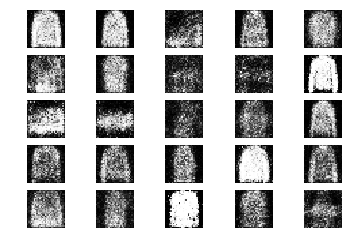

301 [D loss: 0.600046, acc.: 60.94%] [G loss: 0.995435]
302 [D loss: 0.577755, acc.: 68.75%] [G loss: 0.970372]
303 [D loss: 0.602716, acc.: 76.56%] [G loss: 0.926713]
304 [D loss: 0.628552, acc.: 60.94%] [G loss: 0.927400]
305 [D loss: 0.590639, acc.: 70.31%] [G loss: 0.876665]
306 [D loss: 0.620346, acc.: 62.50%] [G loss: 0.881290]
307 [D loss: 0.644293, acc.: 56.25%] [G loss: 1.026727]
308 [D loss: 0.620551, acc.: 65.62%] [G loss: 0.840926]
309 [D loss: 0.613644, acc.: 70.31%] [G loss: 1.008159]
310 [D loss: 0.578945, acc.: 68.75%] [G loss: 1.037078]
311 [D loss: 0.563828, acc.: 67.19%] [G loss: 0.937852]
312 [D loss: 0.662969, acc.: 56.25%] [G loss: 0.979534]
313 [D loss: 0.615357, acc.: 65.62%] [G loss: 0.955125]
314 [D loss: 0.628031, acc.: 68.75%] [G loss: 0.926225]
315 [D loss: 0.571395, acc.: 68.75%] [G loss: 0.888891]
316 [D loss: 0.563848, acc.: 70.31%] [G loss: 0.946622]
317 [D loss: 0.599338, acc.: 64.06%] [G loss: 0.993419]
318 [D loss: 0.608561, acc.: 64.06%] [G loss: 0.

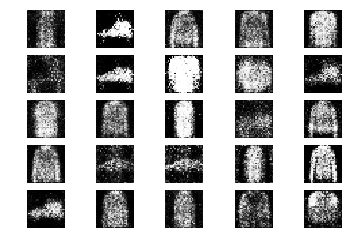

351 [D loss: 0.599002, acc.: 67.19%] [G loss: 0.929769]
352 [D loss: 0.568376, acc.: 71.88%] [G loss: 0.940877]
353 [D loss: 0.517764, acc.: 75.00%] [G loss: 1.059109]
354 [D loss: 0.617967, acc.: 73.44%] [G loss: 0.986638]
355 [D loss: 0.635589, acc.: 60.94%] [G loss: 0.917871]
356 [D loss: 0.598111, acc.: 71.88%] [G loss: 0.955193]
357 [D loss: 0.596705, acc.: 73.44%] [G loss: 1.007353]
358 [D loss: 0.686266, acc.: 56.25%] [G loss: 0.950894]
359 [D loss: 0.655817, acc.: 62.50%] [G loss: 0.888748]
360 [D loss: 0.600998, acc.: 73.44%] [G loss: 0.975791]
361 [D loss: 0.498734, acc.: 76.56%] [G loss: 1.010563]
362 [D loss: 0.665753, acc.: 59.38%] [G loss: 0.916025]
363 [D loss: 0.560539, acc.: 71.88%] [G loss: 0.935885]
364 [D loss: 0.587454, acc.: 67.19%] [G loss: 1.017982]
365 [D loss: 0.563006, acc.: 71.88%] [G loss: 0.960630]
366 [D loss: 0.571733, acc.: 65.62%] [G loss: 0.914170]
367 [D loss: 0.617392, acc.: 65.62%] [G loss: 0.931512]
368 [D loss: 0.604032, acc.: 67.19%] [G loss: 0.

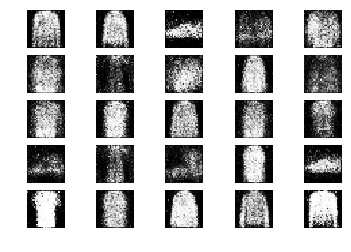

401 [D loss: 0.591138, acc.: 68.75%] [G loss: 1.029223]
402 [D loss: 0.651570, acc.: 57.81%] [G loss: 0.846921]
403 [D loss: 0.653242, acc.: 67.19%] [G loss: 0.956023]
404 [D loss: 0.580578, acc.: 67.19%] [G loss: 0.927656]
405 [D loss: 0.565087, acc.: 71.88%] [G loss: 0.919245]
406 [D loss: 0.618073, acc.: 62.50%] [G loss: 0.906850]
407 [D loss: 0.611842, acc.: 70.31%] [G loss: 0.967831]
408 [D loss: 0.651925, acc.: 60.94%] [G loss: 0.972438]
409 [D loss: 0.535387, acc.: 78.12%] [G loss: 1.006646]
410 [D loss: 0.635750, acc.: 57.81%] [G loss: 0.903254]
411 [D loss: 0.712072, acc.: 56.25%] [G loss: 0.993707]
412 [D loss: 0.678731, acc.: 60.94%] [G loss: 0.839002]
413 [D loss: 0.559200, acc.: 73.44%] [G loss: 0.868773]
414 [D loss: 0.662335, acc.: 64.06%] [G loss: 0.893494]
415 [D loss: 0.578710, acc.: 73.44%] [G loss: 0.933643]
416 [D loss: 0.664144, acc.: 59.38%] [G loss: 0.888644]
417 [D loss: 0.632749, acc.: 65.62%] [G loss: 1.001563]
418 [D loss: 0.603344, acc.: 67.19%] [G loss: 0.

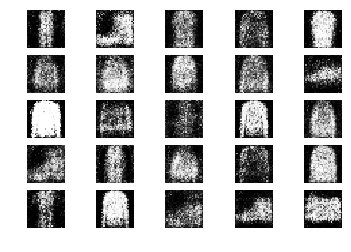

451 [D loss: 0.569378, acc.: 71.88%] [G loss: 0.998670]
452 [D loss: 0.585736, acc.: 71.88%] [G loss: 0.958205]
453 [D loss: 0.625451, acc.: 62.50%] [G loss: 0.919287]
454 [D loss: 0.617596, acc.: 71.88%] [G loss: 0.916097]
455 [D loss: 0.638183, acc.: 65.62%] [G loss: 0.963309]
456 [D loss: 0.639906, acc.: 62.50%] [G loss: 0.879899]
457 [D loss: 0.559984, acc.: 73.44%] [G loss: 0.964343]
458 [D loss: 0.670009, acc.: 60.94%] [G loss: 0.913040]
459 [D loss: 0.638554, acc.: 57.81%] [G loss: 0.912840]
460 [D loss: 0.538426, acc.: 71.88%] [G loss: 1.014253]
461 [D loss: 0.687255, acc.: 65.62%] [G loss: 0.967872]
462 [D loss: 0.604217, acc.: 65.62%] [G loss: 1.022321]
463 [D loss: 0.565838, acc.: 71.88%] [G loss: 0.974183]
464 [D loss: 0.645806, acc.: 60.94%] [G loss: 1.057062]
465 [D loss: 0.629517, acc.: 67.19%] [G loss: 0.892192]
466 [D loss: 0.614927, acc.: 65.62%] [G loss: 0.892684]
467 [D loss: 0.557289, acc.: 79.69%] [G loss: 1.034238]
468 [D loss: 0.616637, acc.: 64.06%] [G loss: 0.

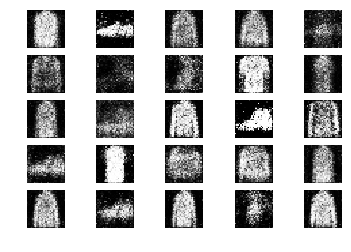

501 [D loss: 0.576716, acc.: 70.31%] [G loss: 0.971989]
502 [D loss: 0.560325, acc.: 73.44%] [G loss: 0.933381]
503 [D loss: 0.599516, acc.: 67.19%] [G loss: 0.851706]
504 [D loss: 0.551658, acc.: 64.06%] [G loss: 0.986956]
505 [D loss: 0.616637, acc.: 64.06%] [G loss: 0.932463]
506 [D loss: 0.623103, acc.: 67.19%] [G loss: 1.017222]
507 [D loss: 0.604510, acc.: 60.94%] [G loss: 1.006418]
508 [D loss: 0.548249, acc.: 73.44%] [G loss: 0.941129]
509 [D loss: 0.605954, acc.: 65.62%] [G loss: 0.978426]
510 [D loss: 0.564110, acc.: 65.62%] [G loss: 1.070365]
511 [D loss: 0.605923, acc.: 68.75%] [G loss: 0.943136]
512 [D loss: 0.561557, acc.: 71.88%] [G loss: 1.033488]
513 [D loss: 0.700685, acc.: 60.94%] [G loss: 1.047044]
514 [D loss: 0.593723, acc.: 65.62%] [G loss: 0.893548]
515 [D loss: 0.626819, acc.: 62.50%] [G loss: 0.973472]
516 [D loss: 0.549759, acc.: 79.69%] [G loss: 0.889180]
517 [D loss: 0.636045, acc.: 64.06%] [G loss: 0.899733]
518 [D loss: 0.583836, acc.: 65.62%] [G loss: 0.

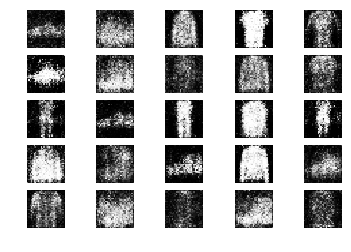

551 [D loss: 0.585722, acc.: 68.75%] [G loss: 0.870660]
552 [D loss: 0.577983, acc.: 67.19%] [G loss: 0.855784]
553 [D loss: 0.558342, acc.: 70.31%] [G loss: 0.939281]
554 [D loss: 0.606476, acc.: 64.06%] [G loss: 1.001137]
555 [D loss: 0.646761, acc.: 57.81%] [G loss: 0.929382]
556 [D loss: 0.566211, acc.: 73.44%] [G loss: 0.887085]
557 [D loss: 0.632390, acc.: 60.94%] [G loss: 0.955735]
558 [D loss: 0.578456, acc.: 68.75%] [G loss: 0.973588]
559 [D loss: 0.644845, acc.: 62.50%] [G loss: 0.896487]
560 [D loss: 0.641710, acc.: 65.62%] [G loss: 0.911086]
561 [D loss: 0.660282, acc.: 64.06%] [G loss: 0.872248]
562 [D loss: 0.669410, acc.: 62.50%] [G loss: 0.994931]
563 [D loss: 0.624541, acc.: 64.06%] [G loss: 0.894508]
564 [D loss: 0.585429, acc.: 70.31%] [G loss: 0.965682]
565 [D loss: 0.616834, acc.: 65.62%] [G loss: 0.998367]
566 [D loss: 0.645234, acc.: 53.12%] [G loss: 0.972106]
567 [D loss: 0.545769, acc.: 71.88%] [G loss: 0.908601]
568 [D loss: 0.556641, acc.: 73.44%] [G loss: 0.

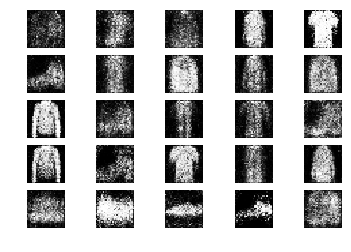

601 [D loss: 0.595193, acc.: 70.31%] [G loss: 0.954685]
602 [D loss: 0.682438, acc.: 54.69%] [G loss: 1.011284]
603 [D loss: 0.616233, acc.: 64.06%] [G loss: 0.951379]
604 [D loss: 0.659351, acc.: 57.81%] [G loss: 0.877847]
605 [D loss: 0.616696, acc.: 64.06%] [G loss: 0.821346]
606 [D loss: 0.577476, acc.: 65.62%] [G loss: 0.842196]
607 [D loss: 0.585242, acc.: 68.75%] [G loss: 0.837512]
608 [D loss: 0.558396, acc.: 73.44%] [G loss: 0.897051]
609 [D loss: 0.610648, acc.: 71.88%] [G loss: 0.877573]
610 [D loss: 0.595722, acc.: 70.31%] [G loss: 0.987571]
611 [D loss: 0.605617, acc.: 64.06%] [G loss: 0.927964]
612 [D loss: 0.613957, acc.: 67.19%] [G loss: 0.882051]
613 [D loss: 0.592489, acc.: 73.44%] [G loss: 0.969257]
614 [D loss: 0.523692, acc.: 71.88%] [G loss: 0.881507]
615 [D loss: 0.642438, acc.: 54.69%] [G loss: 0.894430]
616 [D loss: 0.472535, acc.: 85.94%] [G loss: 0.946931]
617 [D loss: 0.601148, acc.: 65.62%] [G loss: 0.864823]
618 [D loss: 0.506398, acc.: 68.75%] [G loss: 0.

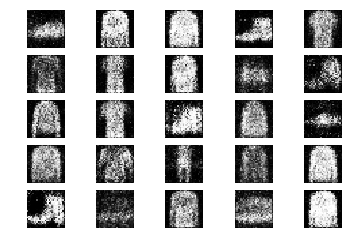

651 [D loss: 0.594436, acc.: 70.31%] [G loss: 0.849742]
652 [D loss: 0.554448, acc.: 75.00%] [G loss: 0.930573]
653 [D loss: 0.546817, acc.: 73.44%] [G loss: 0.891893]
654 [D loss: 0.598639, acc.: 64.06%] [G loss: 0.971084]
655 [D loss: 0.514476, acc.: 75.00%] [G loss: 0.984064]
656 [D loss: 0.706576, acc.: 51.56%] [G loss: 0.922697]
657 [D loss: 0.610534, acc.: 64.06%] [G loss: 0.967418]
658 [D loss: 0.615147, acc.: 67.19%] [G loss: 0.830768]
659 [D loss: 0.604338, acc.: 68.75%] [G loss: 0.960918]
660 [D loss: 0.524852, acc.: 78.12%] [G loss: 1.038927]
661 [D loss: 0.658326, acc.: 59.38%] [G loss: 1.059891]
662 [D loss: 0.581858, acc.: 70.31%] [G loss: 1.002139]
663 [D loss: 0.587914, acc.: 68.75%] [G loss: 1.045450]
664 [D loss: 0.607520, acc.: 62.50%] [G loss: 0.903558]
665 [D loss: 0.549997, acc.: 75.00%] [G loss: 0.978226]
666 [D loss: 0.628869, acc.: 65.62%] [G loss: 0.998803]
667 [D loss: 0.585150, acc.: 68.75%] [G loss: 0.925054]
668 [D loss: 0.666640, acc.: 54.69%] [G loss: 0.

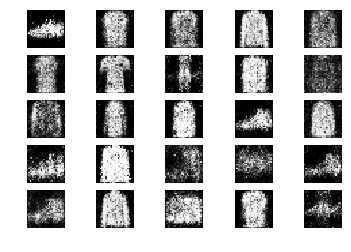

701 [D loss: 0.623656, acc.: 64.06%] [G loss: 0.937764]
702 [D loss: 0.562136, acc.: 67.19%] [G loss: 1.034548]
703 [D loss: 0.610737, acc.: 64.06%] [G loss: 0.926575]
704 [D loss: 0.545219, acc.: 71.88%] [G loss: 0.936527]
705 [D loss: 0.609303, acc.: 65.62%] [G loss: 0.969279]
706 [D loss: 0.669207, acc.: 53.12%] [G loss: 1.011297]
707 [D loss: 0.605387, acc.: 67.19%] [G loss: 0.956930]
708 [D loss: 0.575891, acc.: 68.75%] [G loss: 0.906191]
709 [D loss: 0.559385, acc.: 70.31%] [G loss: 0.991542]
710 [D loss: 0.625889, acc.: 68.75%] [G loss: 0.869754]
711 [D loss: 0.533968, acc.: 76.56%] [G loss: 0.916204]
712 [D loss: 0.610454, acc.: 59.38%] [G loss: 0.881809]
713 [D loss: 0.621205, acc.: 65.62%] [G loss: 1.018418]
714 [D loss: 0.598716, acc.: 75.00%] [G loss: 0.983456]
715 [D loss: 0.649267, acc.: 67.19%] [G loss: 0.945310]
716 [D loss: 0.619200, acc.: 62.50%] [G loss: 1.082081]
717 [D loss: 0.576284, acc.: 68.75%] [G loss: 1.007757]
718 [D loss: 0.540833, acc.: 73.44%] [G loss: 1.

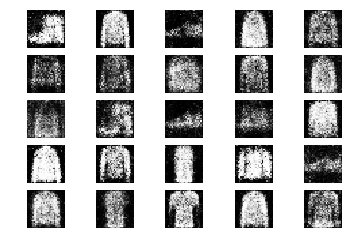

751 [D loss: 0.539437, acc.: 71.88%] [G loss: 0.935319]
752 [D loss: 0.598460, acc.: 67.19%] [G loss: 1.006679]
753 [D loss: 0.594111, acc.: 68.75%] [G loss: 1.062359]
754 [D loss: 0.574193, acc.: 70.31%] [G loss: 1.022668]
755 [D loss: 0.638170, acc.: 68.75%] [G loss: 0.886410]
756 [D loss: 0.628679, acc.: 62.50%] [G loss: 0.952821]
757 [D loss: 0.570500, acc.: 75.00%] [G loss: 0.895036]
758 [D loss: 0.586490, acc.: 73.44%] [G loss: 1.016730]
759 [D loss: 0.564851, acc.: 76.56%] [G loss: 0.998375]
760 [D loss: 0.573037, acc.: 75.00%] [G loss: 0.958132]
761 [D loss: 0.627616, acc.: 60.94%] [G loss: 0.987648]
762 [D loss: 0.562765, acc.: 71.88%] [G loss: 0.825059]
763 [D loss: 0.570009, acc.: 68.75%] [G loss: 0.947180]
764 [D loss: 0.605259, acc.: 67.19%] [G loss: 0.969388]
765 [D loss: 0.626121, acc.: 57.81%] [G loss: 0.923963]
766 [D loss: 0.559638, acc.: 71.88%] [G loss: 0.925996]
767 [D loss: 0.648028, acc.: 70.31%] [G loss: 0.866500]
768 [D loss: 0.614735, acc.: 64.06%] [G loss: 0.

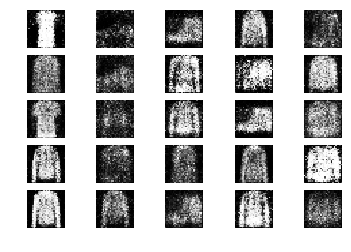

801 [D loss: 0.630239, acc.: 65.62%] [G loss: 0.819251]
802 [D loss: 0.614379, acc.: 60.94%] [G loss: 0.979029]
803 [D loss: 0.624042, acc.: 67.19%] [G loss: 0.831291]
804 [D loss: 0.563538, acc.: 73.44%] [G loss: 0.922087]
805 [D loss: 0.598583, acc.: 70.31%] [G loss: 0.847613]
806 [D loss: 0.582020, acc.: 65.62%] [G loss: 0.863904]
807 [D loss: 0.631038, acc.: 70.31%] [G loss: 0.929880]
808 [D loss: 0.583236, acc.: 65.62%] [G loss: 1.001652]
809 [D loss: 0.553601, acc.: 70.31%] [G loss: 0.945765]
810 [D loss: 0.605068, acc.: 64.06%] [G loss: 0.968673]
811 [D loss: 0.593666, acc.: 70.31%] [G loss: 0.980476]
812 [D loss: 0.612002, acc.: 59.38%] [G loss: 0.979564]
813 [D loss: 0.660584, acc.: 57.81%] [G loss: 0.958624]
814 [D loss: 0.596773, acc.: 70.31%] [G loss: 1.067545]
815 [D loss: 0.613860, acc.: 59.38%] [G loss: 0.942116]
816 [D loss: 0.579606, acc.: 68.75%] [G loss: 0.974846]
817 [D loss: 0.634498, acc.: 65.62%] [G loss: 1.009250]
818 [D loss: 0.633770, acc.: 65.62%] [G loss: 0.

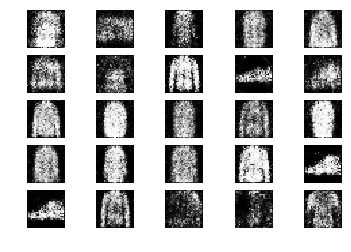

851 [D loss: 0.580426, acc.: 68.75%] [G loss: 0.953830]
852 [D loss: 0.505583, acc.: 81.25%] [G loss: 0.950806]
853 [D loss: 0.578373, acc.: 65.62%] [G loss: 0.933653]
854 [D loss: 0.591439, acc.: 71.88%] [G loss: 0.890149]
855 [D loss: 0.579024, acc.: 73.44%] [G loss: 0.967378]
856 [D loss: 0.622398, acc.: 62.50%] [G loss: 0.909500]
857 [D loss: 0.555090, acc.: 70.31%] [G loss: 0.926205]
858 [D loss: 0.562547, acc.: 71.88%] [G loss: 1.101460]
859 [D loss: 0.570372, acc.: 70.31%] [G loss: 0.933946]
860 [D loss: 0.644059, acc.: 59.38%] [G loss: 1.005439]
861 [D loss: 0.604707, acc.: 75.00%] [G loss: 0.963154]
862 [D loss: 0.667015, acc.: 56.25%] [G loss: 1.052838]
863 [D loss: 0.497894, acc.: 78.12%] [G loss: 1.048467]
864 [D loss: 0.666654, acc.: 71.88%] [G loss: 0.939416]
865 [D loss: 0.639648, acc.: 59.38%] [G loss: 0.993476]
866 [D loss: 0.612089, acc.: 65.62%] [G loss: 0.927956]
867 [D loss: 0.575944, acc.: 71.88%] [G loss: 0.878237]
868 [D loss: 0.548255, acc.: 75.00%] [G loss: 0.

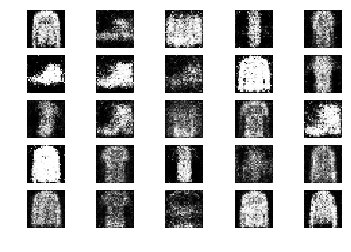

901 [D loss: 0.640544, acc.: 57.81%] [G loss: 0.986966]
902 [D loss: 0.548586, acc.: 75.00%] [G loss: 1.021572]
903 [D loss: 0.526675, acc.: 75.00%] [G loss: 1.019515]
904 [D loss: 0.579356, acc.: 67.19%] [G loss: 1.000154]
905 [D loss: 0.541919, acc.: 78.12%] [G loss: 1.096092]
906 [D loss: 0.573742, acc.: 62.50%] [G loss: 1.074420]
907 [D loss: 0.580464, acc.: 68.75%] [G loss: 0.931929]
908 [D loss: 0.602333, acc.: 64.06%] [G loss: 1.034001]
909 [D loss: 0.629808, acc.: 64.06%] [G loss: 1.003759]
910 [D loss: 0.679807, acc.: 62.50%] [G loss: 0.897166]
911 [D loss: 0.615134, acc.: 64.06%] [G loss: 0.955330]
912 [D loss: 0.650258, acc.: 62.50%] [G loss: 0.952391]
913 [D loss: 0.597675, acc.: 65.62%] [G loss: 0.935650]
914 [D loss: 0.617554, acc.: 59.38%] [G loss: 0.956085]
915 [D loss: 0.581793, acc.: 70.31%] [G loss: 0.929978]
916 [D loss: 0.660305, acc.: 53.12%] [G loss: 0.859952]
917 [D loss: 0.612250, acc.: 64.06%] [G loss: 0.968006]
918 [D loss: 0.554310, acc.: 71.88%] [G loss: 1.

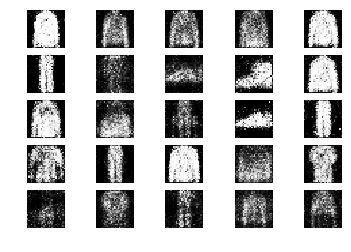

951 [D loss: 0.637325, acc.: 56.25%] [G loss: 0.997643]
952 [D loss: 0.713358, acc.: 45.31%] [G loss: 0.883526]
953 [D loss: 0.584961, acc.: 75.00%] [G loss: 0.955590]
954 [D loss: 0.593637, acc.: 67.19%] [G loss: 1.054367]
955 [D loss: 0.608865, acc.: 60.94%] [G loss: 1.103929]
956 [D loss: 0.623261, acc.: 67.19%] [G loss: 1.013210]
957 [D loss: 0.675124, acc.: 59.38%] [G loss: 0.903057]
958 [D loss: 0.682646, acc.: 57.81%] [G loss: 0.811140]
959 [D loss: 0.622784, acc.: 65.62%] [G loss: 0.860319]
960 [D loss: 0.612001, acc.: 62.50%] [G loss: 0.920302]
961 [D loss: 0.685169, acc.: 57.81%] [G loss: 0.982053]
962 [D loss: 0.573192, acc.: 68.75%] [G loss: 0.999189]
963 [D loss: 0.552317, acc.: 75.00%] [G loss: 0.952139]
964 [D loss: 0.610772, acc.: 64.06%] [G loss: 0.934073]
965 [D loss: 0.551559, acc.: 79.69%] [G loss: 1.043516]
966 [D loss: 0.560246, acc.: 70.31%] [G loss: 1.028429]
967 [D loss: 0.585243, acc.: 73.44%] [G loss: 1.027174]
968 [D loss: 0.643064, acc.: 67.19%] [G loss: 0.

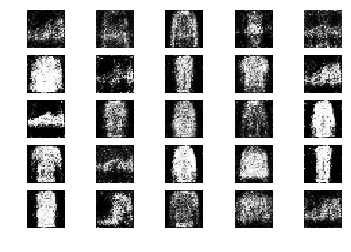

1001 [D loss: 0.574284, acc.: 71.88%] [G loss: 1.011627]
1002 [D loss: 0.582812, acc.: 65.62%] [G loss: 0.918209]
1003 [D loss: 0.543429, acc.: 67.19%] [G loss: 1.068188]
1004 [D loss: 0.635815, acc.: 64.06%] [G loss: 1.068002]
1005 [D loss: 0.517400, acc.: 73.44%] [G loss: 1.080407]
1006 [D loss: 0.586866, acc.: 67.19%] [G loss: 1.038350]
1007 [D loss: 0.538096, acc.: 76.56%] [G loss: 0.948757]
1008 [D loss: 0.595918, acc.: 65.62%] [G loss: 0.950021]
1009 [D loss: 0.597189, acc.: 70.31%] [G loss: 1.034728]
1010 [D loss: 0.598629, acc.: 71.88%] [G loss: 0.915931]
1011 [D loss: 0.602210, acc.: 62.50%] [G loss: 0.944351]
1012 [D loss: 0.618815, acc.: 68.75%] [G loss: 0.955017]
1013 [D loss: 0.621612, acc.: 71.88%] [G loss: 0.983721]
1014 [D loss: 0.564400, acc.: 76.56%] [G loss: 1.010372]
1015 [D loss: 0.553469, acc.: 68.75%] [G loss: 1.015924]
1016 [D loss: 0.560880, acc.: 73.44%] [G loss: 0.958235]
1017 [D loss: 0.618453, acc.: 62.50%] [G loss: 0.903837]
1018 [D loss: 0.588342, acc.: 6

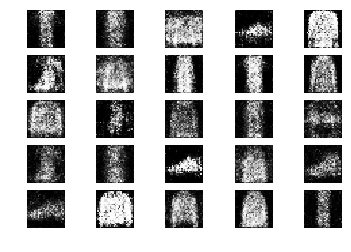

1051 [D loss: 0.567999, acc.: 67.19%] [G loss: 1.044108]
1052 [D loss: 0.598118, acc.: 70.31%] [G loss: 1.013585]
1053 [D loss: 0.657106, acc.: 56.25%] [G loss: 0.907400]
1054 [D loss: 0.566764, acc.: 65.62%] [G loss: 0.890569]
1055 [D loss: 0.524497, acc.: 81.25%] [G loss: 0.974184]
1056 [D loss: 0.583311, acc.: 71.88%] [G loss: 0.928370]
1057 [D loss: 0.560664, acc.: 68.75%] [G loss: 0.971266]
1058 [D loss: 0.578097, acc.: 71.88%] [G loss: 0.994415]
1059 [D loss: 0.578334, acc.: 71.88%] [G loss: 0.928538]
1060 [D loss: 0.541964, acc.: 76.56%] [G loss: 1.054788]
1061 [D loss: 0.593763, acc.: 70.31%] [G loss: 0.953333]
1062 [D loss: 0.523911, acc.: 76.56%] [G loss: 1.058678]
1063 [D loss: 0.626957, acc.: 65.62%] [G loss: 0.979179]
1064 [D loss: 0.487327, acc.: 70.31%] [G loss: 1.051705]
1065 [D loss: 0.622090, acc.: 64.06%] [G loss: 0.996725]
1066 [D loss: 0.647678, acc.: 67.19%] [G loss: 1.099464]
1067 [D loss: 0.585560, acc.: 67.19%] [G loss: 1.068222]
1068 [D loss: 0.643050, acc.: 6

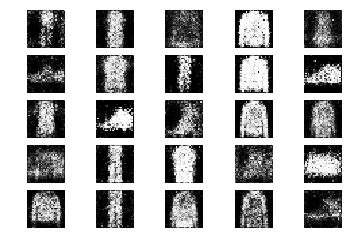

1101 [D loss: 0.584603, acc.: 68.75%] [G loss: 0.941317]
1102 [D loss: 0.613451, acc.: 59.38%] [G loss: 0.921404]
1103 [D loss: 0.597045, acc.: 68.75%] [G loss: 1.071628]
1104 [D loss: 0.614461, acc.: 64.06%] [G loss: 0.981810]
1105 [D loss: 0.581112, acc.: 68.75%] [G loss: 1.022564]
1106 [D loss: 0.579187, acc.: 67.19%] [G loss: 1.030394]
1107 [D loss: 0.581389, acc.: 73.44%] [G loss: 1.084422]
1108 [D loss: 0.656609, acc.: 56.25%] [G loss: 1.004812]
1109 [D loss: 0.625102, acc.: 71.88%] [G loss: 1.016415]
1110 [D loss: 0.591650, acc.: 64.06%] [G loss: 0.939939]
1111 [D loss: 0.544992, acc.: 78.12%] [G loss: 1.078318]
1112 [D loss: 0.589305, acc.: 60.94%] [G loss: 1.100288]
1113 [D loss: 0.671121, acc.: 51.56%] [G loss: 1.084079]
1114 [D loss: 0.619527, acc.: 64.06%] [G loss: 1.185334]
1115 [D loss: 0.584013, acc.: 62.50%] [G loss: 1.045614]
1116 [D loss: 0.656596, acc.: 53.12%] [G loss: 0.947777]
1117 [D loss: 0.544708, acc.: 73.44%] [G loss: 0.903290]
1118 [D loss: 0.596965, acc.: 6

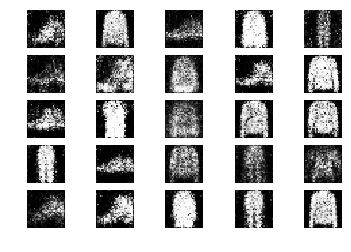

1151 [D loss: 0.592568, acc.: 65.62%] [G loss: 0.975857]
1152 [D loss: 0.653190, acc.: 67.19%] [G loss: 1.078489]
1153 [D loss: 0.592217, acc.: 73.44%] [G loss: 0.888472]
1154 [D loss: 0.642984, acc.: 65.62%] [G loss: 0.968792]
1155 [D loss: 0.584342, acc.: 68.75%] [G loss: 1.021630]
1156 [D loss: 0.598022, acc.: 71.88%] [G loss: 1.015021]
1157 [D loss: 0.685541, acc.: 60.94%] [G loss: 1.115128]
1158 [D loss: 0.577318, acc.: 78.12%] [G loss: 0.940489]
1159 [D loss: 0.629935, acc.: 65.62%] [G loss: 0.978029]
1160 [D loss: 0.597971, acc.: 70.31%] [G loss: 0.993911]
1161 [D loss: 0.512564, acc.: 73.44%] [G loss: 1.041785]
1162 [D loss: 0.571030, acc.: 68.75%] [G loss: 1.051659]
1163 [D loss: 0.609689, acc.: 67.19%] [G loss: 0.967147]
1164 [D loss: 0.535889, acc.: 73.44%] [G loss: 1.067277]
1165 [D loss: 0.592168, acc.: 67.19%] [G loss: 1.020456]
1166 [D loss: 0.623132, acc.: 65.62%] [G loss: 1.080196]
1167 [D loss: 0.643375, acc.: 65.62%] [G loss: 0.877091]
1168 [D loss: 0.577005, acc.: 7

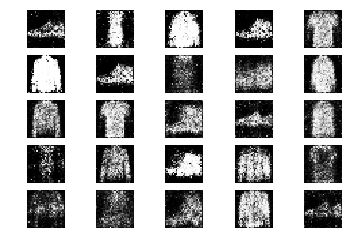

1201 [D loss: 0.601057, acc.: 67.19%] [G loss: 0.991252]
1202 [D loss: 0.606831, acc.: 65.62%] [G loss: 0.978122]
1203 [D loss: 0.650613, acc.: 62.50%] [G loss: 0.944778]
1204 [D loss: 0.616918, acc.: 67.19%] [G loss: 0.958942]
1205 [D loss: 0.650119, acc.: 60.94%] [G loss: 0.992630]
1206 [D loss: 0.650742, acc.: 62.50%] [G loss: 0.897284]
1207 [D loss: 0.581411, acc.: 70.31%] [G loss: 1.013542]
1208 [D loss: 0.586810, acc.: 67.19%] [G loss: 0.917751]
1209 [D loss: 0.587018, acc.: 67.19%] [G loss: 0.904617]
1210 [D loss: 0.618357, acc.: 62.50%] [G loss: 0.903155]
1211 [D loss: 0.566184, acc.: 76.56%] [G loss: 0.950374]
1212 [D loss: 0.624945, acc.: 65.62%] [G loss: 1.028951]
1213 [D loss: 0.533810, acc.: 75.00%] [G loss: 0.959466]
1214 [D loss: 0.649212, acc.: 65.62%] [G loss: 1.035778]
1215 [D loss: 0.616360, acc.: 64.06%] [G loss: 1.013691]
1216 [D loss: 0.594055, acc.: 67.19%] [G loss: 1.000443]
1217 [D loss: 0.625548, acc.: 60.94%] [G loss: 0.950478]
1218 [D loss: 0.550434, acc.: 7

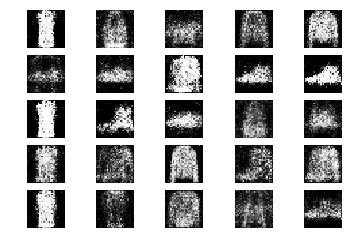

1251 [D loss: 0.626891, acc.: 64.06%] [G loss: 0.930776]
1252 [D loss: 0.587652, acc.: 75.00%] [G loss: 0.949051]
1253 [D loss: 0.547212, acc.: 73.44%] [G loss: 1.050119]
1254 [D loss: 0.608164, acc.: 70.31%] [G loss: 0.891939]
1255 [D loss: 0.641215, acc.: 57.81%] [G loss: 1.026237]
1256 [D loss: 0.552786, acc.: 68.75%] [G loss: 0.865415]
1257 [D loss: 0.615238, acc.: 64.06%] [G loss: 0.936597]
1258 [D loss: 0.604781, acc.: 65.62%] [G loss: 0.876857]
1259 [D loss: 0.548264, acc.: 71.88%] [G loss: 0.971083]
1260 [D loss: 0.578662, acc.: 64.06%] [G loss: 0.990144]
1261 [D loss: 0.622118, acc.: 67.19%] [G loss: 1.088631]
1262 [D loss: 0.579401, acc.: 67.19%] [G loss: 0.887319]
1263 [D loss: 0.568744, acc.: 70.31%] [G loss: 0.870267]
1264 [D loss: 0.609188, acc.: 59.38%] [G loss: 0.925487]
1265 [D loss: 0.617312, acc.: 62.50%] [G loss: 0.877521]
1266 [D loss: 0.515821, acc.: 73.44%] [G loss: 0.846439]
1267 [D loss: 0.638143, acc.: 62.50%] [G loss: 0.977704]
1268 [D loss: 0.571885, acc.: 7

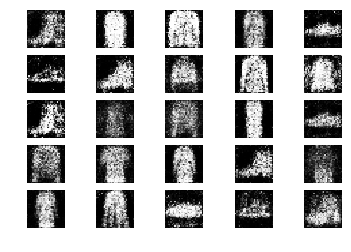

1301 [D loss: 0.658477, acc.: 60.94%] [G loss: 0.939925]
1302 [D loss: 0.629303, acc.: 53.12%] [G loss: 0.962663]
1303 [D loss: 0.595458, acc.: 62.50%] [G loss: 0.934107]
1304 [D loss: 0.565244, acc.: 65.62%] [G loss: 1.041474]
1305 [D loss: 0.497316, acc.: 78.12%] [G loss: 0.933792]
1306 [D loss: 0.594169, acc.: 64.06%] [G loss: 1.065766]
1307 [D loss: 0.683972, acc.: 51.56%] [G loss: 0.871471]
1308 [D loss: 0.636693, acc.: 67.19%] [G loss: 0.725293]
1309 [D loss: 0.587073, acc.: 67.19%] [G loss: 0.941556]
1310 [D loss: 0.565870, acc.: 76.56%] [G loss: 0.932497]
1311 [D loss: 0.577914, acc.: 68.75%] [G loss: 0.875417]
1312 [D loss: 0.527015, acc.: 71.88%] [G loss: 0.900899]
1313 [D loss: 0.558282, acc.: 71.88%] [G loss: 0.817417]
1314 [D loss: 0.625315, acc.: 65.62%] [G loss: 0.924585]
1315 [D loss: 0.542653, acc.: 68.75%] [G loss: 0.990765]
1316 [D loss: 0.580524, acc.: 68.75%] [G loss: 1.027369]
1317 [D loss: 0.605594, acc.: 60.94%] [G loss: 1.032301]
1318 [D loss: 0.626871, acc.: 7

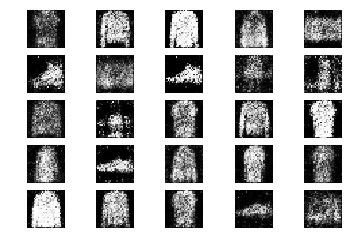

1351 [D loss: 0.710391, acc.: 51.56%] [G loss: 0.972195]
1352 [D loss: 0.609904, acc.: 67.19%] [G loss: 1.097969]
1353 [D loss: 0.660808, acc.: 62.50%] [G loss: 1.014302]
1354 [D loss: 0.633181, acc.: 70.31%] [G loss: 0.957379]
1355 [D loss: 0.609675, acc.: 59.38%] [G loss: 1.005524]
1356 [D loss: 0.611000, acc.: 68.75%] [G loss: 0.993264]
1357 [D loss: 0.515684, acc.: 79.69%] [G loss: 1.028428]
1358 [D loss: 0.560008, acc.: 71.88%] [G loss: 1.041721]
1359 [D loss: 0.687478, acc.: 56.25%] [G loss: 0.916163]
1360 [D loss: 0.626800, acc.: 64.06%] [G loss: 1.066783]
1361 [D loss: 0.596189, acc.: 62.50%] [G loss: 1.126126]
1362 [D loss: 0.624360, acc.: 65.62%] [G loss: 1.043272]
1363 [D loss: 0.629490, acc.: 64.06%] [G loss: 0.934642]
1364 [D loss: 0.602764, acc.: 64.06%] [G loss: 0.925561]
1365 [D loss: 0.675203, acc.: 53.12%] [G loss: 0.962669]
1366 [D loss: 0.588758, acc.: 68.75%] [G loss: 0.928963]
1367 [D loss: 0.627388, acc.: 65.62%] [G loss: 0.927584]
1368 [D loss: 0.600001, acc.: 6

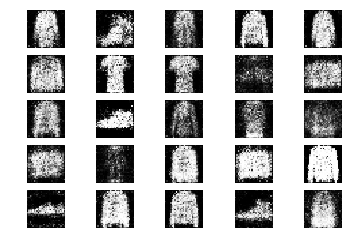

1401 [D loss: 0.637367, acc.: 60.94%] [G loss: 1.013778]
1402 [D loss: 0.621865, acc.: 67.19%] [G loss: 0.974485]
1403 [D loss: 0.530464, acc.: 68.75%] [G loss: 0.963369]
1404 [D loss: 0.628597, acc.: 65.62%] [G loss: 1.013432]
1405 [D loss: 0.591569, acc.: 68.75%] [G loss: 1.083535]
1406 [D loss: 0.701804, acc.: 56.25%] [G loss: 0.996223]
1407 [D loss: 0.598987, acc.: 75.00%] [G loss: 1.070210]
1408 [D loss: 0.657447, acc.: 65.62%] [G loss: 0.978962]
1409 [D loss: 0.635251, acc.: 70.31%] [G loss: 0.931147]
1410 [D loss: 0.604125, acc.: 62.50%] [G loss: 0.961569]
1411 [D loss: 0.586691, acc.: 67.19%] [G loss: 0.910930]
1412 [D loss: 0.581789, acc.: 70.31%] [G loss: 0.974954]
1413 [D loss: 0.607661, acc.: 65.62%] [G loss: 0.948270]
1414 [D loss: 0.623471, acc.: 64.06%] [G loss: 0.984522]
1415 [D loss: 0.615628, acc.: 71.88%] [G loss: 1.059880]
1416 [D loss: 0.525462, acc.: 79.69%] [G loss: 1.083093]
1417 [D loss: 0.681632, acc.: 60.94%] [G loss: 0.954641]
1418 [D loss: 0.544897, acc.: 7

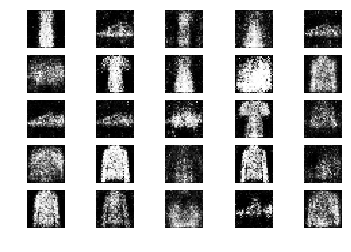

1451 [D loss: 0.600518, acc.: 65.62%] [G loss: 0.956410]
1452 [D loss: 0.621161, acc.: 60.94%] [G loss: 0.964822]
1453 [D loss: 0.583101, acc.: 65.62%] [G loss: 1.049941]
1454 [D loss: 0.559163, acc.: 70.31%] [G loss: 1.133959]
1455 [D loss: 0.640090, acc.: 62.50%] [G loss: 1.041073]
1456 [D loss: 0.636981, acc.: 65.62%] [G loss: 1.140302]
1457 [D loss: 0.605537, acc.: 67.19%] [G loss: 0.987902]
1458 [D loss: 0.585851, acc.: 67.19%] [G loss: 0.977220]
1459 [D loss: 0.577367, acc.: 71.88%] [G loss: 1.042462]
1460 [D loss: 0.595107, acc.: 62.50%] [G loss: 1.012837]
1461 [D loss: 0.633007, acc.: 68.75%] [G loss: 1.015519]
1462 [D loss: 0.664105, acc.: 57.81%] [G loss: 1.131944]
1463 [D loss: 0.544797, acc.: 75.00%] [G loss: 1.100067]
1464 [D loss: 0.666400, acc.: 56.25%] [G loss: 1.018906]
1465 [D loss: 0.594609, acc.: 68.75%] [G loss: 1.040141]
1466 [D loss: 0.586830, acc.: 71.88%] [G loss: 1.060533]
1467 [D loss: 0.600313, acc.: 73.44%] [G loss: 0.987943]
1468 [D loss: 0.639202, acc.: 6

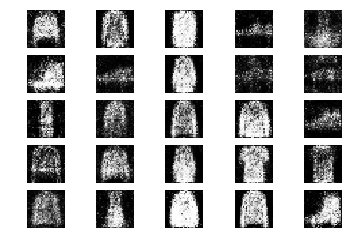

1501 [D loss: 0.618354, acc.: 64.06%] [G loss: 0.926240]
1502 [D loss: 0.602639, acc.: 65.62%] [G loss: 1.063628]
1503 [D loss: 0.539127, acc.: 73.44%] [G loss: 0.958627]
1504 [D loss: 0.666053, acc.: 65.62%] [G loss: 0.856454]
1505 [D loss: 0.611734, acc.: 71.88%] [G loss: 0.838715]
1506 [D loss: 0.595788, acc.: 65.62%] [G loss: 0.884140]
1507 [D loss: 0.616285, acc.: 65.62%] [G loss: 0.897763]
1508 [D loss: 0.616218, acc.: 59.38%] [G loss: 0.917722]
1509 [D loss: 0.639380, acc.: 64.06%] [G loss: 1.003460]
1510 [D loss: 0.636212, acc.: 60.94%] [G loss: 0.953378]
1511 [D loss: 0.630972, acc.: 62.50%] [G loss: 0.904764]
1512 [D loss: 0.592112, acc.: 70.31%] [G loss: 0.888963]
1513 [D loss: 0.645808, acc.: 53.12%] [G loss: 0.958873]
1514 [D loss: 0.617749, acc.: 59.38%] [G loss: 1.004368]
1515 [D loss: 0.629720, acc.: 64.06%] [G loss: 0.927877]
1516 [D loss: 0.693242, acc.: 65.62%] [G loss: 0.927311]
1517 [D loss: 0.578631, acc.: 68.75%] [G loss: 1.025717]
1518 [D loss: 0.618067, acc.: 7

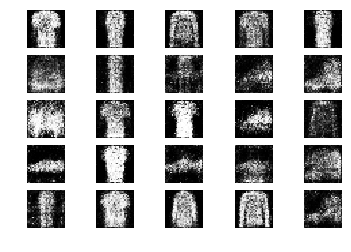

1551 [D loss: 0.624643, acc.: 65.62%] [G loss: 1.003580]
1552 [D loss: 0.619405, acc.: 67.19%] [G loss: 1.031655]
1553 [D loss: 0.588334, acc.: 60.94%] [G loss: 0.956793]
1554 [D loss: 0.584709, acc.: 68.75%] [G loss: 1.010967]
1555 [D loss: 0.535905, acc.: 70.31%] [G loss: 1.023384]
1556 [D loss: 0.635179, acc.: 68.75%] [G loss: 0.977901]
1557 [D loss: 0.610119, acc.: 67.19%] [G loss: 1.070835]
1558 [D loss: 0.710878, acc.: 56.25%] [G loss: 1.078078]
1559 [D loss: 0.632650, acc.: 59.38%] [G loss: 0.935421]
1560 [D loss: 0.613465, acc.: 67.19%] [G loss: 1.027182]
1561 [D loss: 0.606442, acc.: 62.50%] [G loss: 0.900532]
1562 [D loss: 0.663278, acc.: 51.56%] [G loss: 0.949359]
1563 [D loss: 0.530770, acc.: 75.00%] [G loss: 1.041585]
1564 [D loss: 0.617493, acc.: 68.75%] [G loss: 1.019125]
1565 [D loss: 0.558963, acc.: 76.56%] [G loss: 1.007064]
1566 [D loss: 0.599027, acc.: 73.44%] [G loss: 0.933847]
1567 [D loss: 0.555171, acc.: 71.88%] [G loss: 0.928618]
1568 [D loss: 0.575343, acc.: 7

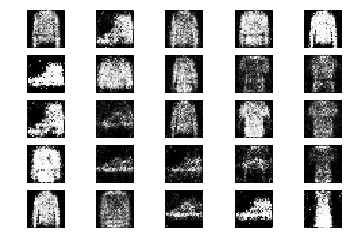

1601 [D loss: 0.623207, acc.: 64.06%] [G loss: 1.023719]
1602 [D loss: 0.592481, acc.: 65.62%] [G loss: 1.057828]
1603 [D loss: 0.564111, acc.: 76.56%] [G loss: 1.009424]
1604 [D loss: 0.668826, acc.: 56.25%] [G loss: 0.990784]
1605 [D loss: 0.591031, acc.: 68.75%] [G loss: 1.030826]
1606 [D loss: 0.593542, acc.: 67.19%] [G loss: 0.875788]
1607 [D loss: 0.618327, acc.: 65.62%] [G loss: 0.920604]
1608 [D loss: 0.512758, acc.: 79.69%] [G loss: 1.005560]
1609 [D loss: 0.657287, acc.: 59.38%] [G loss: 0.889035]
1610 [D loss: 0.674289, acc.: 59.38%] [G loss: 1.014620]
1611 [D loss: 0.563596, acc.: 75.00%] [G loss: 1.069562]
1612 [D loss: 0.664164, acc.: 60.94%] [G loss: 0.974488]
1613 [D loss: 0.647279, acc.: 56.25%] [G loss: 1.006101]
1614 [D loss: 0.576433, acc.: 68.75%] [G loss: 0.878638]
1615 [D loss: 0.634082, acc.: 54.69%] [G loss: 1.008225]
1616 [D loss: 0.654313, acc.: 60.94%] [G loss: 0.879304]
1617 [D loss: 0.626138, acc.: 64.06%] [G loss: 0.992039]
1618 [D loss: 0.637093, acc.: 5

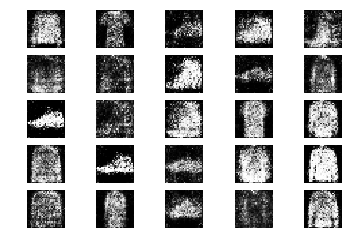

1651 [D loss: 0.600324, acc.: 73.44%] [G loss: 1.037452]
1652 [D loss: 0.547683, acc.: 75.00%] [G loss: 0.948449]
1653 [D loss: 0.661534, acc.: 65.62%] [G loss: 0.963853]
1654 [D loss: 0.536577, acc.: 75.00%] [G loss: 1.102688]
1655 [D loss: 0.624228, acc.: 57.81%] [G loss: 1.019125]
1656 [D loss: 0.614113, acc.: 62.50%] [G loss: 0.968486]
1657 [D loss: 0.558459, acc.: 67.19%] [G loss: 0.921066]
1658 [D loss: 0.617440, acc.: 67.19%] [G loss: 0.959179]
1659 [D loss: 0.601781, acc.: 60.94%] [G loss: 0.926971]
1660 [D loss: 0.799053, acc.: 42.19%] [G loss: 0.881584]
1661 [D loss: 0.566053, acc.: 67.19%] [G loss: 0.919749]
1662 [D loss: 0.513235, acc.: 81.25%] [G loss: 0.946318]
1663 [D loss: 0.556432, acc.: 78.12%] [G loss: 0.983698]
1664 [D loss: 0.652521, acc.: 62.50%] [G loss: 1.188343]
1665 [D loss: 0.696716, acc.: 57.81%] [G loss: 1.030574]
1666 [D loss: 0.574187, acc.: 70.31%] [G loss: 0.931220]
1667 [D loss: 0.640585, acc.: 59.38%] [G loss: 0.990070]
1668 [D loss: 0.551928, acc.: 7

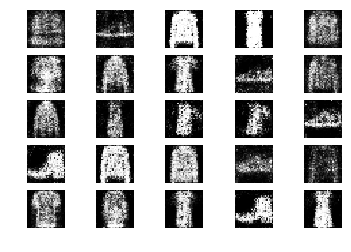

1701 [D loss: 0.621477, acc.: 64.06%] [G loss: 0.969892]
1702 [D loss: 0.609119, acc.: 73.44%] [G loss: 0.979488]
1703 [D loss: 0.578557, acc.: 67.19%] [G loss: 0.966185]
1704 [D loss: 0.632470, acc.: 65.62%] [G loss: 0.996152]
1705 [D loss: 0.651145, acc.: 59.38%] [G loss: 0.899242]
1706 [D loss: 0.567490, acc.: 76.56%] [G loss: 1.019088]
1707 [D loss: 0.523940, acc.: 73.44%] [G loss: 1.011788]
1708 [D loss: 0.601279, acc.: 67.19%] [G loss: 1.035420]
1709 [D loss: 0.619981, acc.: 60.94%] [G loss: 0.953009]
1710 [D loss: 0.498768, acc.: 79.69%] [G loss: 1.016291]
1711 [D loss: 0.539437, acc.: 78.12%] [G loss: 1.091055]
1712 [D loss: 0.676007, acc.: 51.56%] [G loss: 0.959886]
1713 [D loss: 0.568527, acc.: 70.31%] [G loss: 0.950685]
1714 [D loss: 0.566856, acc.: 73.44%] [G loss: 0.926878]
1715 [D loss: 0.571664, acc.: 67.19%] [G loss: 1.021294]
1716 [D loss: 0.561715, acc.: 73.44%] [G loss: 0.953310]
1717 [D loss: 0.606838, acc.: 62.50%] [G loss: 0.999185]
1718 [D loss: 0.565070, acc.: 7

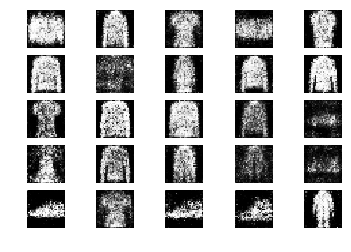

1751 [D loss: 0.596784, acc.: 65.62%] [G loss: 1.062032]
1752 [D loss: 0.587719, acc.: 62.50%] [G loss: 0.985541]
1753 [D loss: 0.653904, acc.: 60.94%] [G loss: 1.017255]
1754 [D loss: 0.652009, acc.: 62.50%] [G loss: 0.893897]
1755 [D loss: 0.593755, acc.: 65.62%] [G loss: 0.953837]
1756 [D loss: 0.626002, acc.: 60.94%] [G loss: 0.936665]
1757 [D loss: 0.675540, acc.: 59.38%] [G loss: 0.863408]
1758 [D loss: 0.621249, acc.: 62.50%] [G loss: 0.939401]
1759 [D loss: 0.602106, acc.: 64.06%] [G loss: 0.979722]
1760 [D loss: 0.541890, acc.: 68.75%] [G loss: 1.023276]
1761 [D loss: 0.574518, acc.: 68.75%] [G loss: 0.991077]
1762 [D loss: 0.618121, acc.: 64.06%] [G loss: 0.917669]
1763 [D loss: 0.653624, acc.: 62.50%] [G loss: 0.974714]
1764 [D loss: 0.575169, acc.: 70.31%] [G loss: 1.048868]
1765 [D loss: 0.671535, acc.: 59.38%] [G loss: 1.018978]
1766 [D loss: 0.573437, acc.: 64.06%] [G loss: 1.042200]
1767 [D loss: 0.607593, acc.: 57.81%] [G loss: 0.959407]
1768 [D loss: 0.646686, acc.: 6

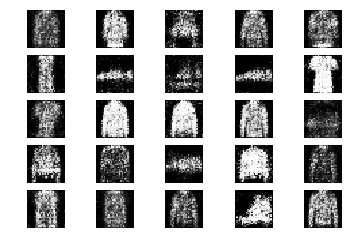

1801 [D loss: 0.654421, acc.: 64.06%] [G loss: 0.983765]
1802 [D loss: 0.663116, acc.: 62.50%] [G loss: 0.960081]
1803 [D loss: 0.617683, acc.: 67.19%] [G loss: 0.948098]
1804 [D loss: 0.650827, acc.: 64.06%] [G loss: 0.813894]
1805 [D loss: 0.615378, acc.: 60.94%] [G loss: 0.992465]
1806 [D loss: 0.584493, acc.: 75.00%] [G loss: 1.010466]
1807 [D loss: 0.585607, acc.: 64.06%] [G loss: 0.939829]
1808 [D loss: 0.595772, acc.: 68.75%] [G loss: 0.993597]
1809 [D loss: 0.573366, acc.: 67.19%] [G loss: 1.017607]
1810 [D loss: 0.605675, acc.: 65.62%] [G loss: 1.114033]
1811 [D loss: 0.628359, acc.: 65.62%] [G loss: 1.018666]
1812 [D loss: 0.615949, acc.: 70.31%] [G loss: 1.003272]
1813 [D loss: 0.575548, acc.: 70.31%] [G loss: 1.047574]
1814 [D loss: 0.690267, acc.: 59.38%] [G loss: 0.995545]
1815 [D loss: 0.646741, acc.: 64.06%] [G loss: 0.905563]
1816 [D loss: 0.660363, acc.: 56.25%] [G loss: 0.976989]
1817 [D loss: 0.657171, acc.: 59.38%] [G loss: 0.927574]
1818 [D loss: 0.558602, acc.: 7

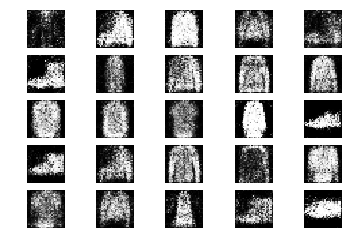

1851 [D loss: 0.533454, acc.: 79.69%] [G loss: 0.953544]
1852 [D loss: 0.553089, acc.: 71.88%] [G loss: 1.006522]
1853 [D loss: 0.621388, acc.: 60.94%] [G loss: 1.058444]
1854 [D loss: 0.607355, acc.: 68.75%] [G loss: 1.003932]
1855 [D loss: 0.608476, acc.: 67.19%] [G loss: 0.952322]
1856 [D loss: 0.667534, acc.: 67.19%] [G loss: 0.966000]
1857 [D loss: 0.589384, acc.: 64.06%] [G loss: 0.905979]
1858 [D loss: 0.707569, acc.: 57.81%] [G loss: 0.871380]
1859 [D loss: 0.579435, acc.: 70.31%] [G loss: 0.951103]
1860 [D loss: 0.730013, acc.: 51.56%] [G loss: 0.957226]
1861 [D loss: 0.586445, acc.: 67.19%] [G loss: 1.008870]
1862 [D loss: 0.637530, acc.: 65.62%] [G loss: 0.968940]
1863 [D loss: 0.562300, acc.: 75.00%] [G loss: 1.045337]
1864 [D loss: 0.605503, acc.: 65.62%] [G loss: 0.897039]
1865 [D loss: 0.607460, acc.: 68.75%] [G loss: 1.030049]
1866 [D loss: 0.648526, acc.: 64.06%] [G loss: 1.018578]
1867 [D loss: 0.639503, acc.: 64.06%] [G loss: 1.022890]
1868 [D loss: 0.542585, acc.: 8

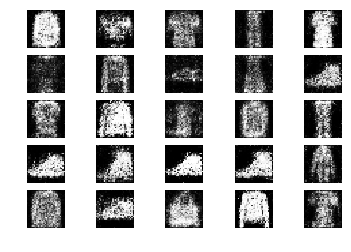

1901 [D loss: 0.649456, acc.: 57.81%] [G loss: 1.012166]
1902 [D loss: 0.591294, acc.: 68.75%] [G loss: 1.047835]
1903 [D loss: 0.536774, acc.: 73.44%] [G loss: 0.986259]
1904 [D loss: 0.577910, acc.: 70.31%] [G loss: 1.008955]
1905 [D loss: 0.661710, acc.: 56.25%] [G loss: 0.966433]
1906 [D loss: 0.581975, acc.: 68.75%] [G loss: 1.008638]
1907 [D loss: 0.619251, acc.: 68.75%] [G loss: 1.005949]
1908 [D loss: 0.580882, acc.: 65.62%] [G loss: 0.972919]
1909 [D loss: 0.586632, acc.: 68.75%] [G loss: 0.904319]
1910 [D loss: 0.610889, acc.: 60.94%] [G loss: 0.949925]
1911 [D loss: 0.608359, acc.: 65.62%] [G loss: 0.934281]
1912 [D loss: 0.606356, acc.: 64.06%] [G loss: 0.946371]
1913 [D loss: 0.654343, acc.: 60.94%] [G loss: 0.977288]
1914 [D loss: 0.659975, acc.: 62.50%] [G loss: 0.967315]
1915 [D loss: 0.636604, acc.: 68.75%] [G loss: 0.953633]
1916 [D loss: 0.585481, acc.: 71.88%] [G loss: 0.883982]
1917 [D loss: 0.665479, acc.: 59.38%] [G loss: 0.936084]
1918 [D loss: 0.636961, acc.: 5

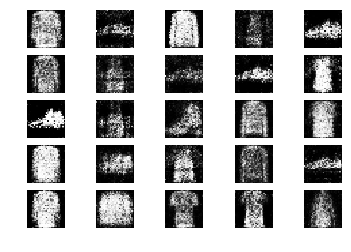

1951 [D loss: 0.672233, acc.: 54.69%] [G loss: 1.006983]
1952 [D loss: 0.658592, acc.: 50.00%] [G loss: 0.978042]
1953 [D loss: 0.570564, acc.: 65.62%] [G loss: 0.962288]
1954 [D loss: 0.575327, acc.: 70.31%] [G loss: 0.989453]
1955 [D loss: 0.636201, acc.: 57.81%] [G loss: 1.037583]
1956 [D loss: 0.648995, acc.: 59.38%] [G loss: 0.962610]
1957 [D loss: 0.626416, acc.: 64.06%] [G loss: 1.035299]
1958 [D loss: 0.616572, acc.: 64.06%] [G loss: 0.946495]
1959 [D loss: 0.553911, acc.: 78.12%] [G loss: 1.098650]
1960 [D loss: 0.562813, acc.: 79.69%] [G loss: 0.976244]
1961 [D loss: 0.545470, acc.: 70.31%] [G loss: 1.001081]
1962 [D loss: 0.693247, acc.: 54.69%] [G loss: 0.915165]
1963 [D loss: 0.729134, acc.: 50.00%] [G loss: 0.971604]
1964 [D loss: 0.598655, acc.: 60.94%] [G loss: 0.908947]
1965 [D loss: 0.650354, acc.: 60.94%] [G loss: 0.943122]
1966 [D loss: 0.554299, acc.: 76.56%] [G loss: 0.958059]
1967 [D loss: 0.594203, acc.: 65.62%] [G loss: 0.976568]
1968 [D loss: 0.579517, acc.: 6

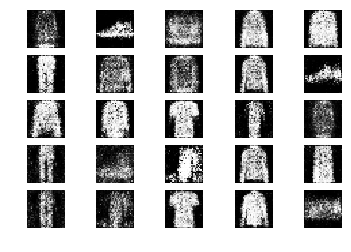

2001 [D loss: 0.638274, acc.: 67.19%] [G loss: 1.064425]
2002 [D loss: 0.634459, acc.: 67.19%] [G loss: 0.997373]
2003 [D loss: 0.577175, acc.: 73.44%] [G loss: 0.914731]
2004 [D loss: 0.599248, acc.: 67.19%] [G loss: 0.905154]
2005 [D loss: 0.676454, acc.: 60.94%] [G loss: 0.977617]
2006 [D loss: 0.633207, acc.: 64.06%] [G loss: 1.025219]
2007 [D loss: 0.520552, acc.: 78.12%] [G loss: 1.025255]
2008 [D loss: 0.545958, acc.: 75.00%] [G loss: 1.046411]
2009 [D loss: 0.624315, acc.: 60.94%] [G loss: 1.025239]
2010 [D loss: 0.627167, acc.: 60.94%] [G loss: 0.949984]
2011 [D loss: 0.520179, acc.: 75.00%] [G loss: 1.059915]
2012 [D loss: 0.616478, acc.: 68.75%] [G loss: 0.981165]
2013 [D loss: 0.546349, acc.: 70.31%] [G loss: 1.063977]
2014 [D loss: 0.662017, acc.: 64.06%] [G loss: 0.948672]
2015 [D loss: 0.616283, acc.: 64.06%] [G loss: 1.066526]
2016 [D loss: 0.625241, acc.: 59.38%] [G loss: 1.017252]
2017 [D loss: 0.603804, acc.: 67.19%] [G loss: 1.013709]
2018 [D loss: 0.525950, acc.: 7

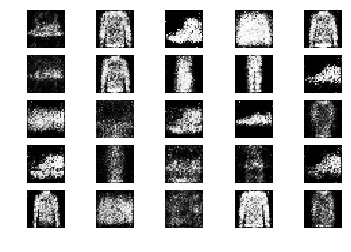

2051 [D loss: 0.685757, acc.: 65.62%] [G loss: 0.958571]
2052 [D loss: 0.678720, acc.: 56.25%] [G loss: 0.926257]
2053 [D loss: 0.599822, acc.: 65.62%] [G loss: 0.941989]
2054 [D loss: 0.650962, acc.: 64.06%] [G loss: 0.924906]
2055 [D loss: 0.611597, acc.: 62.50%] [G loss: 1.015624]
2056 [D loss: 0.603706, acc.: 73.44%] [G loss: 1.111942]
2057 [D loss: 0.596639, acc.: 71.88%] [G loss: 0.963918]
2058 [D loss: 0.617282, acc.: 65.62%] [G loss: 0.969814]
2059 [D loss: 0.595078, acc.: 65.62%] [G loss: 0.955211]
2060 [D loss: 0.535681, acc.: 71.88%] [G loss: 0.942281]
2061 [D loss: 0.664546, acc.: 60.94%] [G loss: 0.919636]
2062 [D loss: 0.603611, acc.: 65.62%] [G loss: 1.007389]
2063 [D loss: 0.568993, acc.: 70.31%] [G loss: 1.011067]
2064 [D loss: 0.602942, acc.: 67.19%] [G loss: 0.974092]
2065 [D loss: 0.599923, acc.: 62.50%] [G loss: 1.010241]
2066 [D loss: 0.545485, acc.: 71.88%] [G loss: 1.003068]
2067 [D loss: 0.693255, acc.: 59.38%] [G loss: 1.057712]
2068 [D loss: 0.679487, acc.: 5

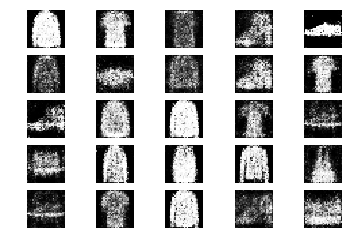

2101 [D loss: 0.665975, acc.: 51.56%] [G loss: 0.912958]
2102 [D loss: 0.653213, acc.: 62.50%] [G loss: 0.968262]
2103 [D loss: 0.584191, acc.: 71.88%] [G loss: 1.018210]
2104 [D loss: 0.588930, acc.: 73.44%] [G loss: 0.883287]
2105 [D loss: 0.614481, acc.: 67.19%] [G loss: 0.997079]
2106 [D loss: 0.663476, acc.: 65.62%] [G loss: 0.935624]
2107 [D loss: 0.624201, acc.: 60.94%] [G loss: 0.991454]
2108 [D loss: 0.566765, acc.: 75.00%] [G loss: 0.951190]
2109 [D loss: 0.612583, acc.: 65.62%] [G loss: 0.904422]
2110 [D loss: 0.650779, acc.: 62.50%] [G loss: 0.945210]
2111 [D loss: 0.594796, acc.: 67.19%] [G loss: 0.975972]
2112 [D loss: 0.617968, acc.: 62.50%] [G loss: 0.966115]
2113 [D loss: 0.562645, acc.: 71.88%] [G loss: 1.015849]
2114 [D loss: 0.631514, acc.: 67.19%] [G loss: 1.031355]
2115 [D loss: 0.662079, acc.: 50.00%] [G loss: 0.922006]
2116 [D loss: 0.659426, acc.: 57.81%] [G loss: 0.936764]
2117 [D loss: 0.694423, acc.: 56.25%] [G loss: 0.986680]
2118 [D loss: 0.623261, acc.: 6

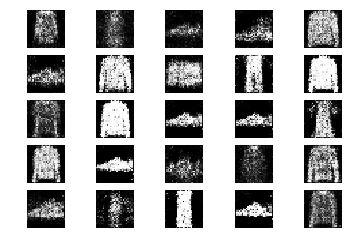

2151 [D loss: 0.641659, acc.: 60.94%] [G loss: 1.015453]
2152 [D loss: 0.593763, acc.: 70.31%] [G loss: 0.981563]
2153 [D loss: 0.652902, acc.: 62.50%] [G loss: 1.033971]
2154 [D loss: 0.648811, acc.: 68.75%] [G loss: 1.009092]
2155 [D loss: 0.608209, acc.: 64.06%] [G loss: 0.980444]
2156 [D loss: 0.620598, acc.: 62.50%] [G loss: 0.990749]
2157 [D loss: 0.596149, acc.: 60.94%] [G loss: 1.017985]
2158 [D loss: 0.657173, acc.: 62.50%] [G loss: 0.998507]
2159 [D loss: 0.697165, acc.: 54.69%] [G loss: 0.952947]
2160 [D loss: 0.582736, acc.: 65.62%] [G loss: 0.974923]
2161 [D loss: 0.673747, acc.: 54.69%] [G loss: 0.988053]
2162 [D loss: 0.539597, acc.: 82.81%] [G loss: 0.953728]
2163 [D loss: 0.612122, acc.: 65.62%] [G loss: 0.873715]
2164 [D loss: 0.608188, acc.: 65.62%] [G loss: 0.971318]
2165 [D loss: 0.568068, acc.: 70.31%] [G loss: 0.989986]
2166 [D loss: 0.591982, acc.: 67.19%] [G loss: 1.011289]
2167 [D loss: 0.647311, acc.: 53.12%] [G loss: 1.004045]
2168 [D loss: 0.603348, acc.: 6

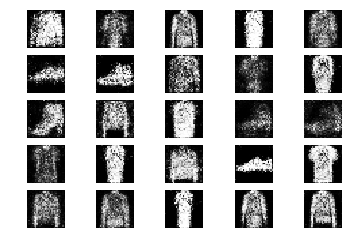

2201 [D loss: 0.588014, acc.: 70.31%] [G loss: 1.013184]
2202 [D loss: 0.593975, acc.: 68.75%] [G loss: 0.977463]
2203 [D loss: 0.639261, acc.: 57.81%] [G loss: 1.072846]
2204 [D loss: 0.618644, acc.: 68.75%] [G loss: 0.995381]
2205 [D loss: 0.604444, acc.: 65.62%] [G loss: 1.021662]
2206 [D loss: 0.580823, acc.: 70.31%] [G loss: 1.097023]
2207 [D loss: 0.658239, acc.: 54.69%] [G loss: 1.015986]
2208 [D loss: 0.671239, acc.: 60.94%] [G loss: 0.926245]
2209 [D loss: 0.581927, acc.: 68.75%] [G loss: 1.014849]
2210 [D loss: 0.636869, acc.: 64.06%] [G loss: 0.950200]
2211 [D loss: 0.669701, acc.: 62.50%] [G loss: 0.940109]
2212 [D loss: 0.604669, acc.: 59.38%] [G loss: 1.010475]
2213 [D loss: 0.673134, acc.: 54.69%] [G loss: 0.970031]
2214 [D loss: 0.562555, acc.: 76.56%] [G loss: 1.084236]
2215 [D loss: 0.738061, acc.: 62.50%] [G loss: 1.029239]
2216 [D loss: 0.646048, acc.: 57.81%] [G loss: 0.977589]
2217 [D loss: 0.600866, acc.: 62.50%] [G loss: 1.020740]
2218 [D loss: 0.624639, acc.: 6

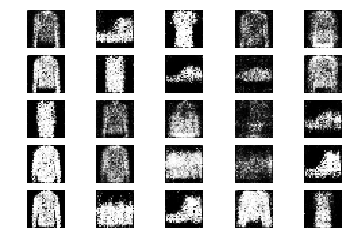

2251 [D loss: 0.629017, acc.: 56.25%] [G loss: 1.013797]
2252 [D loss: 0.575529, acc.: 70.31%] [G loss: 0.965438]
2253 [D loss: 0.613124, acc.: 64.06%] [G loss: 0.929002]
2254 [D loss: 0.595393, acc.: 62.50%] [G loss: 1.024017]
2255 [D loss: 0.651211, acc.: 54.69%] [G loss: 1.065896]
2256 [D loss: 0.653520, acc.: 67.19%] [G loss: 1.028397]
2257 [D loss: 0.650046, acc.: 57.81%] [G loss: 1.035071]
2258 [D loss: 0.618164, acc.: 67.19%] [G loss: 1.054530]
2259 [D loss: 0.622288, acc.: 65.62%] [G loss: 0.969850]
2260 [D loss: 0.620558, acc.: 67.19%] [G loss: 0.925878]
2261 [D loss: 0.638655, acc.: 68.75%] [G loss: 0.961919]
2262 [D loss: 0.583183, acc.: 67.19%] [G loss: 0.966043]
2263 [D loss: 0.582910, acc.: 73.44%] [G loss: 0.942849]
2264 [D loss: 0.606518, acc.: 76.56%] [G loss: 0.951661]
2265 [D loss: 0.634189, acc.: 64.06%] [G loss: 1.056130]
2266 [D loss: 0.631050, acc.: 59.38%] [G loss: 0.991293]
2267 [D loss: 0.659680, acc.: 57.81%] [G loss: 0.942230]
2268 [D loss: 0.569162, acc.: 7

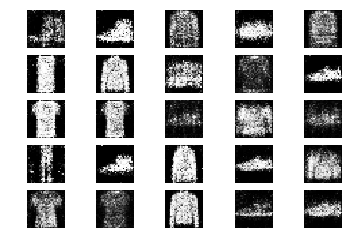

2301 [D loss: 0.567138, acc.: 75.00%] [G loss: 0.942084]
2302 [D loss: 0.631071, acc.: 70.31%] [G loss: 0.941036]
2303 [D loss: 0.650492, acc.: 59.38%] [G loss: 0.948837]
2304 [D loss: 0.632161, acc.: 59.38%] [G loss: 0.953432]
2305 [D loss: 0.593829, acc.: 64.06%] [G loss: 1.043574]
2306 [D loss: 0.610756, acc.: 65.62%] [G loss: 0.980842]
2307 [D loss: 0.655050, acc.: 59.38%] [G loss: 0.986717]
2308 [D loss: 0.531679, acc.: 75.00%] [G loss: 0.946310]
2309 [D loss: 0.677094, acc.: 56.25%] [G loss: 0.956590]
2310 [D loss: 0.637812, acc.: 59.38%] [G loss: 1.008194]
2311 [D loss: 0.579812, acc.: 62.50%] [G loss: 0.968539]
2312 [D loss: 0.645929, acc.: 57.81%] [G loss: 0.905965]
2313 [D loss: 0.567672, acc.: 64.06%] [G loss: 1.034723]
2314 [D loss: 0.576943, acc.: 68.75%] [G loss: 1.009437]
2315 [D loss: 0.616953, acc.: 65.62%] [G loss: 1.070423]
2316 [D loss: 0.594533, acc.: 67.19%] [G loss: 0.985020]
2317 [D loss: 0.598703, acc.: 70.31%] [G loss: 1.004312]
2318 [D loss: 0.662276, acc.: 5

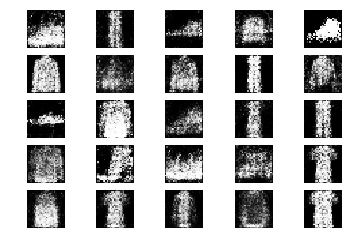

2351 [D loss: 0.553671, acc.: 76.56%] [G loss: 1.098415]
2352 [D loss: 0.613233, acc.: 68.75%] [G loss: 1.124444]
2353 [D loss: 0.650927, acc.: 67.19%] [G loss: 0.907517]
2354 [D loss: 0.679968, acc.: 54.69%] [G loss: 0.994736]
2355 [D loss: 0.606506, acc.: 68.75%] [G loss: 1.018338]
2356 [D loss: 0.549030, acc.: 82.81%] [G loss: 0.984659]
2357 [D loss: 0.514799, acc.: 73.44%] [G loss: 1.110526]
2358 [D loss: 0.610692, acc.: 64.06%] [G loss: 1.092277]
2359 [D loss: 0.639761, acc.: 57.81%] [G loss: 1.158133]
2360 [D loss: 0.605445, acc.: 67.19%] [G loss: 0.998284]
2361 [D loss: 0.637583, acc.: 71.88%] [G loss: 0.987490]
2362 [D loss: 0.592557, acc.: 67.19%] [G loss: 0.971758]
2363 [D loss: 0.559420, acc.: 73.44%] [G loss: 1.062679]
2364 [D loss: 0.592714, acc.: 68.75%] [G loss: 0.911363]
2365 [D loss: 0.623928, acc.: 64.06%] [G loss: 1.044729]
2366 [D loss: 0.669466, acc.: 64.06%] [G loss: 1.011199]
2367 [D loss: 0.677013, acc.: 62.50%] [G loss: 1.069217]
2368 [D loss: 0.573931, acc.: 7

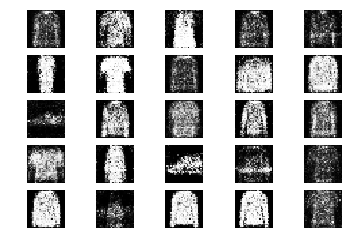

2401 [D loss: 0.623509, acc.: 65.62%] [G loss: 0.930109]
2402 [D loss: 0.560643, acc.: 70.31%] [G loss: 0.934106]
2403 [D loss: 0.666491, acc.: 62.50%] [G loss: 0.929616]
2404 [D loss: 0.677747, acc.: 64.06%] [G loss: 1.073309]
2405 [D loss: 0.592055, acc.: 64.06%] [G loss: 1.076541]
2406 [D loss: 0.612690, acc.: 68.75%] [G loss: 1.014359]
2407 [D loss: 0.563817, acc.: 70.31%] [G loss: 0.998301]
2408 [D loss: 0.607718, acc.: 62.50%] [G loss: 1.097576]
2409 [D loss: 0.587380, acc.: 65.62%] [G loss: 1.003083]
2410 [D loss: 0.663621, acc.: 64.06%] [G loss: 1.007038]
2411 [D loss: 0.659385, acc.: 56.25%] [G loss: 1.033414]
2412 [D loss: 0.611145, acc.: 67.19%] [G loss: 0.974880]
2413 [D loss: 0.669687, acc.: 53.12%] [G loss: 0.945600]
2414 [D loss: 0.641195, acc.: 59.38%] [G loss: 0.929828]
2415 [D loss: 0.650760, acc.: 70.31%] [G loss: 1.005052]
2416 [D loss: 0.617226, acc.: 67.19%] [G loss: 1.032074]
2417 [D loss: 0.670805, acc.: 62.50%] [G loss: 1.060508]
2418 [D loss: 0.584693, acc.: 6

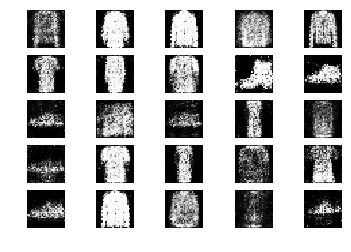

2451 [D loss: 0.555848, acc.: 73.44%] [G loss: 0.897978]
2452 [D loss: 0.609996, acc.: 60.94%] [G loss: 0.855889]
2453 [D loss: 0.665912, acc.: 62.50%] [G loss: 0.984833]
2454 [D loss: 0.617326, acc.: 65.62%] [G loss: 0.925155]
2455 [D loss: 0.588111, acc.: 75.00%] [G loss: 1.065303]
2456 [D loss: 0.667099, acc.: 62.50%] [G loss: 1.052711]
2457 [D loss: 0.663170, acc.: 56.25%] [G loss: 1.075152]
2458 [D loss: 0.650102, acc.: 57.81%] [G loss: 1.071993]
2459 [D loss: 0.606899, acc.: 65.62%] [G loss: 0.997697]
2460 [D loss: 0.598016, acc.: 62.50%] [G loss: 0.978971]
2461 [D loss: 0.621658, acc.: 62.50%] [G loss: 0.995327]
2462 [D loss: 0.684445, acc.: 53.12%] [G loss: 0.908812]
2463 [D loss: 0.620515, acc.: 62.50%] [G loss: 0.871372]
2464 [D loss: 0.611934, acc.: 68.75%] [G loss: 0.994891]
2465 [D loss: 0.606000, acc.: 62.50%] [G loss: 0.936701]
2466 [D loss: 0.561719, acc.: 73.44%] [G loss: 1.085376]
2467 [D loss: 0.634646, acc.: 62.50%] [G loss: 1.082780]
2468 [D loss: 0.623237, acc.: 7

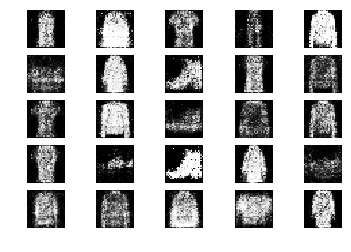

2501 [D loss: 0.600931, acc.: 70.31%] [G loss: 0.954924]
2502 [D loss: 0.712545, acc.: 56.25%] [G loss: 0.901614]
2503 [D loss: 0.572313, acc.: 68.75%] [G loss: 0.935623]
2504 [D loss: 0.546043, acc.: 71.88%] [G loss: 1.062518]
2505 [D loss: 0.575236, acc.: 70.31%] [G loss: 0.967948]
2506 [D loss: 0.619434, acc.: 65.62%] [G loss: 0.937315]
2507 [D loss: 0.586358, acc.: 68.75%] [G loss: 0.889830]
2508 [D loss: 0.629072, acc.: 60.94%] [G loss: 0.912557]
2509 [D loss: 0.649648, acc.: 59.38%] [G loss: 1.076961]
2510 [D loss: 0.648944, acc.: 67.19%] [G loss: 0.970776]
2511 [D loss: 0.612980, acc.: 65.62%] [G loss: 1.061679]
2512 [D loss: 0.603541, acc.: 70.31%] [G loss: 1.015305]
2513 [D loss: 0.635193, acc.: 60.94%] [G loss: 1.048836]
2514 [D loss: 0.507338, acc.: 82.81%] [G loss: 0.960630]
2515 [D loss: 0.630639, acc.: 59.38%] [G loss: 0.925609]
2516 [D loss: 0.678238, acc.: 60.94%] [G loss: 0.944737]
2517 [D loss: 0.569836, acc.: 68.75%] [G loss: 1.103404]
2518 [D loss: 0.613576, acc.: 6

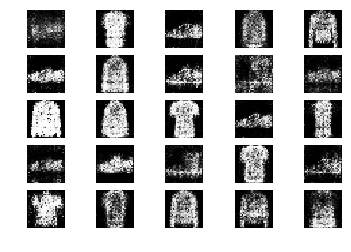

2551 [D loss: 0.567449, acc.: 70.31%] [G loss: 1.049927]
2552 [D loss: 0.601608, acc.: 71.88%] [G loss: 1.043907]
2553 [D loss: 0.583758, acc.: 68.75%] [G loss: 1.010892]
2554 [D loss: 0.690663, acc.: 59.38%] [G loss: 1.032795]
2555 [D loss: 0.579360, acc.: 73.44%] [G loss: 0.969968]
2556 [D loss: 0.457880, acc.: 79.69%] [G loss: 0.956104]
2557 [D loss: 0.623257, acc.: 67.19%] [G loss: 1.150162]
2558 [D loss: 0.645978, acc.: 62.50%] [G loss: 1.125291]
2559 [D loss: 0.592141, acc.: 71.88%] [G loss: 1.034298]
2560 [D loss: 0.573021, acc.: 78.12%] [G loss: 1.015277]
2561 [D loss: 0.581972, acc.: 65.62%] [G loss: 1.045940]
2562 [D loss: 0.633105, acc.: 64.06%] [G loss: 1.008160]
2563 [D loss: 0.562167, acc.: 68.75%] [G loss: 0.994019]
2564 [D loss: 0.585196, acc.: 67.19%] [G loss: 0.933701]
2565 [D loss: 0.572843, acc.: 64.06%] [G loss: 1.115318]
2566 [D loss: 0.576422, acc.: 68.75%] [G loss: 1.029900]
2567 [D loss: 0.622514, acc.: 67.19%] [G loss: 1.090605]
2568 [D loss: 0.615302, acc.: 6

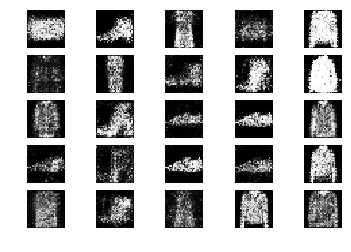

2601 [D loss: 0.671356, acc.: 57.81%] [G loss: 0.972763]
2602 [D loss: 0.615403, acc.: 64.06%] [G loss: 1.024442]
2603 [D loss: 0.610149, acc.: 65.62%] [G loss: 0.968578]
2604 [D loss: 0.698165, acc.: 53.12%] [G loss: 1.049955]
2605 [D loss: 0.645355, acc.: 59.38%] [G loss: 0.958146]
2606 [D loss: 0.648596, acc.: 67.19%] [G loss: 0.994546]
2607 [D loss: 0.558596, acc.: 70.31%] [G loss: 0.972549]
2608 [D loss: 0.583077, acc.: 68.75%] [G loss: 1.026386]
2609 [D loss: 0.582229, acc.: 68.75%] [G loss: 0.996780]
2610 [D loss: 0.689878, acc.: 51.56%] [G loss: 0.916210]
2611 [D loss: 0.694516, acc.: 56.25%] [G loss: 0.966855]
2612 [D loss: 0.617759, acc.: 70.31%] [G loss: 1.019506]
2613 [D loss: 0.619805, acc.: 68.75%] [G loss: 0.953068]
2614 [D loss: 0.551919, acc.: 70.31%] [G loss: 0.943244]
2615 [D loss: 0.712940, acc.: 54.69%] [G loss: 1.011255]
2616 [D loss: 0.660734, acc.: 59.38%] [G loss: 0.970427]
2617 [D loss: 0.640018, acc.: 60.94%] [G loss: 1.014329]
2618 [D loss: 0.657214, acc.: 5

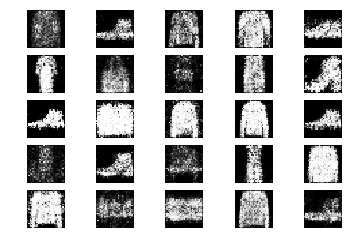

2651 [D loss: 0.648620, acc.: 62.50%] [G loss: 0.790475]
2652 [D loss: 0.616076, acc.: 65.62%] [G loss: 0.852018]
2653 [D loss: 0.633712, acc.: 65.62%] [G loss: 0.883424]
2654 [D loss: 0.609873, acc.: 68.75%] [G loss: 0.970346]
2655 [D loss: 0.599984, acc.: 68.75%] [G loss: 0.948222]
2656 [D loss: 0.634857, acc.: 71.88%] [G loss: 1.023409]
2657 [D loss: 0.643063, acc.: 62.50%] [G loss: 0.999549]
2658 [D loss: 0.604259, acc.: 67.19%] [G loss: 0.989841]
2659 [D loss: 0.708132, acc.: 56.25%] [G loss: 1.019851]
2660 [D loss: 0.660498, acc.: 60.94%] [G loss: 0.954742]
2661 [D loss: 0.581015, acc.: 68.75%] [G loss: 1.002859]
2662 [D loss: 0.647058, acc.: 62.50%] [G loss: 0.934933]
2663 [D loss: 0.718483, acc.: 50.00%] [G loss: 0.990558]
2664 [D loss: 0.553858, acc.: 67.19%] [G loss: 1.065555]
2665 [D loss: 0.614607, acc.: 62.50%] [G loss: 0.963592]
2666 [D loss: 0.652041, acc.: 67.19%] [G loss: 0.951303]
2667 [D loss: 0.623289, acc.: 65.62%] [G loss: 0.904421]
2668 [D loss: 0.645602, acc.: 7

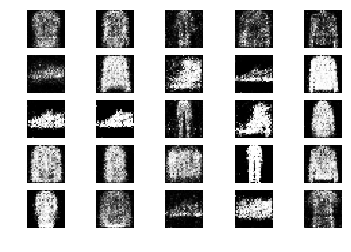

2701 [D loss: 0.516791, acc.: 75.00%] [G loss: 0.965725]
2702 [D loss: 0.692384, acc.: 62.50%] [G loss: 1.043595]
2703 [D loss: 0.651472, acc.: 62.50%] [G loss: 0.919418]
2704 [D loss: 0.620220, acc.: 59.38%] [G loss: 0.997591]
2705 [D loss: 0.635779, acc.: 59.38%] [G loss: 1.003488]
2706 [D loss: 0.631996, acc.: 68.75%] [G loss: 0.953781]
2707 [D loss: 0.727862, acc.: 56.25%] [G loss: 0.941557]
2708 [D loss: 0.633551, acc.: 62.50%] [G loss: 0.895041]
2709 [D loss: 0.562843, acc.: 73.44%] [G loss: 0.921957]
2710 [D loss: 0.594355, acc.: 62.50%] [G loss: 1.003327]
2711 [D loss: 0.646528, acc.: 59.38%] [G loss: 0.959889]
2712 [D loss: 0.595532, acc.: 60.94%] [G loss: 0.965131]
2713 [D loss: 0.704851, acc.: 57.81%] [G loss: 0.978223]
2714 [D loss: 0.694119, acc.: 57.81%] [G loss: 1.059102]
2715 [D loss: 0.587469, acc.: 64.06%] [G loss: 0.974419]
2716 [D loss: 0.668932, acc.: 60.94%] [G loss: 0.997702]
2717 [D loss: 0.612419, acc.: 67.19%] [G loss: 0.944067]
2718 [D loss: 0.663059, acc.: 5

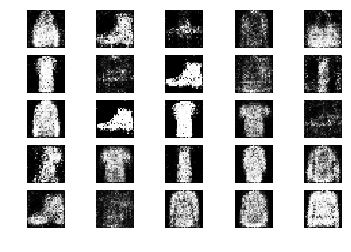

2751 [D loss: 0.622273, acc.: 62.50%] [G loss: 0.904158]
2752 [D loss: 0.674861, acc.: 51.56%] [G loss: 0.945167]
2753 [D loss: 0.662260, acc.: 59.38%] [G loss: 0.936896]
2754 [D loss: 0.600692, acc.: 62.50%] [G loss: 0.932644]
2755 [D loss: 0.679439, acc.: 59.38%] [G loss: 0.911321]
2756 [D loss: 0.676520, acc.: 53.12%] [G loss: 0.937663]
2757 [D loss: 0.570542, acc.: 70.31%] [G loss: 0.981215]
2758 [D loss: 0.612024, acc.: 67.19%] [G loss: 0.909200]
2759 [D loss: 0.553946, acc.: 78.12%] [G loss: 0.992522]
2760 [D loss: 0.610833, acc.: 68.75%] [G loss: 0.892773]
2761 [D loss: 0.763415, acc.: 45.31%] [G loss: 0.911184]
2762 [D loss: 0.686127, acc.: 59.38%] [G loss: 0.977480]
2763 [D loss: 0.601673, acc.: 67.19%] [G loss: 1.025715]
2764 [D loss: 0.660176, acc.: 56.25%] [G loss: 0.937053]
2765 [D loss: 0.633328, acc.: 64.06%] [G loss: 0.882044]
2766 [D loss: 0.584420, acc.: 65.62%] [G loss: 0.947968]
2767 [D loss: 0.604343, acc.: 64.06%] [G loss: 0.914255]
2768 [D loss: 0.625581, acc.: 6

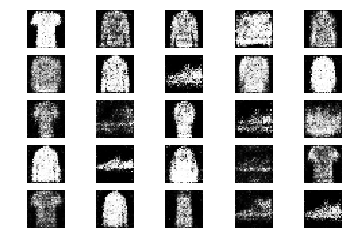

2801 [D loss: 0.553164, acc.: 76.56%] [G loss: 1.035296]
2802 [D loss: 0.622816, acc.: 59.38%] [G loss: 0.861635]
2803 [D loss: 0.608943, acc.: 60.94%] [G loss: 0.981054]
2804 [D loss: 0.661776, acc.: 65.62%] [G loss: 0.876749]
2805 [D loss: 0.625625, acc.: 65.62%] [G loss: 0.957052]
2806 [D loss: 0.644599, acc.: 56.25%] [G loss: 1.013222]
2807 [D loss: 0.654857, acc.: 56.25%] [G loss: 0.914297]
2808 [D loss: 0.676749, acc.: 57.81%] [G loss: 1.041343]
2809 [D loss: 0.628104, acc.: 59.38%] [G loss: 1.074955]
2810 [D loss: 0.615063, acc.: 71.88%] [G loss: 1.017526]
2811 [D loss: 0.599072, acc.: 57.81%] [G loss: 1.035703]
2812 [D loss: 0.595534, acc.: 67.19%] [G loss: 1.022769]
2813 [D loss: 0.613935, acc.: 62.50%] [G loss: 0.906577]
2814 [D loss: 0.612821, acc.: 62.50%] [G loss: 0.991635]
2815 [D loss: 0.633508, acc.: 64.06%] [G loss: 0.942092]
2816 [D loss: 0.696926, acc.: 57.81%] [G loss: 0.942872]
2817 [D loss: 0.578288, acc.: 65.62%] [G loss: 0.936502]
2818 [D loss: 0.626201, acc.: 6

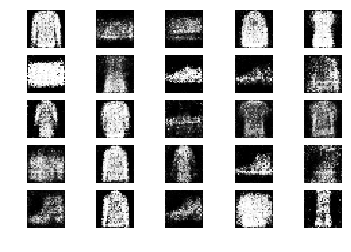

2851 [D loss: 0.583911, acc.: 70.31%] [G loss: 0.936661]
2852 [D loss: 0.583172, acc.: 62.50%] [G loss: 0.930168]
2853 [D loss: 0.581739, acc.: 68.75%] [G loss: 0.896537]
2854 [D loss: 0.665397, acc.: 62.50%] [G loss: 1.018020]
2855 [D loss: 0.746466, acc.: 57.81%] [G loss: 0.933937]
2856 [D loss: 0.610212, acc.: 67.19%] [G loss: 0.951156]
2857 [D loss: 0.621580, acc.: 68.75%] [G loss: 0.853785]
2858 [D loss: 0.653256, acc.: 62.50%] [G loss: 0.961541]
2859 [D loss: 0.694535, acc.: 51.56%] [G loss: 0.929360]
2860 [D loss: 0.643087, acc.: 62.50%] [G loss: 0.939985]
2861 [D loss: 0.609490, acc.: 62.50%] [G loss: 0.930594]
2862 [D loss: 0.637372, acc.: 67.19%] [G loss: 0.980908]
2863 [D loss: 0.663471, acc.: 54.69%] [G loss: 0.972970]
2864 [D loss: 0.638029, acc.: 62.50%] [G loss: 0.971842]
2865 [D loss: 0.604664, acc.: 59.38%] [G loss: 0.917994]
2866 [D loss: 0.631317, acc.: 62.50%] [G loss: 0.962926]
2867 [D loss: 0.653204, acc.: 59.38%] [G loss: 0.924414]
2868 [D loss: 0.675752, acc.: 5

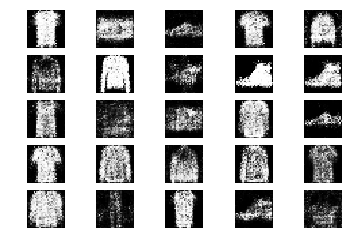

2901 [D loss: 0.587033, acc.: 75.00%] [G loss: 1.034423]
2902 [D loss: 0.678451, acc.: 56.25%] [G loss: 0.974202]
2903 [D loss: 0.628974, acc.: 62.50%] [G loss: 0.934011]
2904 [D loss: 0.659706, acc.: 62.50%] [G loss: 1.064626]
2905 [D loss: 0.647298, acc.: 65.62%] [G loss: 0.922159]
2906 [D loss: 0.563628, acc.: 71.88%] [G loss: 1.047592]
2907 [D loss: 0.625156, acc.: 65.62%] [G loss: 1.072998]
2908 [D loss: 0.611760, acc.: 64.06%] [G loss: 1.035785]
2909 [D loss: 0.609787, acc.: 64.06%] [G loss: 0.977315]
2910 [D loss: 0.710830, acc.: 64.06%] [G loss: 0.992909]
2911 [D loss: 0.607918, acc.: 75.00%] [G loss: 1.033004]
2912 [D loss: 0.633087, acc.: 64.06%] [G loss: 0.902110]
2913 [D loss: 0.595359, acc.: 71.88%] [G loss: 0.927047]
2914 [D loss: 0.654461, acc.: 56.25%] [G loss: 0.919332]
2915 [D loss: 0.671136, acc.: 54.69%] [G loss: 1.010837]
2916 [D loss: 0.601089, acc.: 62.50%] [G loss: 0.890532]
2917 [D loss: 0.606521, acc.: 65.62%] [G loss: 0.945255]
2918 [D loss: 0.660395, acc.: 5

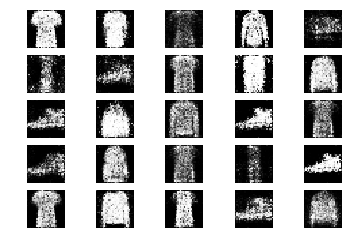

2951 [D loss: 0.610931, acc.: 71.88%] [G loss: 0.876669]
2952 [D loss: 0.571379, acc.: 75.00%] [G loss: 0.866798]
2953 [D loss: 0.636497, acc.: 64.06%] [G loss: 0.991590]
2954 [D loss: 0.558435, acc.: 71.88%] [G loss: 0.977531]
2955 [D loss: 0.618147, acc.: 64.06%] [G loss: 0.943075]
2956 [D loss: 0.658867, acc.: 60.94%] [G loss: 0.913488]
2957 [D loss: 0.600949, acc.: 62.50%] [G loss: 0.899604]
2958 [D loss: 0.621171, acc.: 64.06%] [G loss: 0.958401]
2959 [D loss: 0.624997, acc.: 70.31%] [G loss: 0.911065]
2960 [D loss: 0.568373, acc.: 67.19%] [G loss: 0.921668]
2961 [D loss: 0.654483, acc.: 60.94%] [G loss: 0.886436]
2962 [D loss: 0.668574, acc.: 60.94%] [G loss: 0.903269]
2963 [D loss: 0.665945, acc.: 56.25%] [G loss: 1.010785]
2964 [D loss: 0.602884, acc.: 71.88%] [G loss: 1.074834]
2965 [D loss: 0.546401, acc.: 73.44%] [G loss: 1.083061]
2966 [D loss: 0.655339, acc.: 62.50%] [G loss: 1.005949]
2967 [D loss: 0.568497, acc.: 71.88%] [G loss: 0.992324]
2968 [D loss: 0.558328, acc.: 7

In [23]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

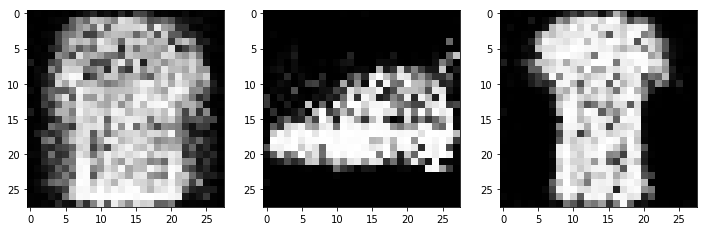

In [32]:
r, c = 3, 3
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()